## Sleep Health and Lifestyle

## 1. Introduction

A sleep disorder is a medical condition that affects an individual's ability to have a healthy and restorative night's sleep. Sleep is an essential part of our daily routine, and disturbances in this natural process can have profound impacts on physical, mental, and emotional well-being. There are various types of sleep disorders, each characterized by distinct symptoms and underlying causes.

Common sleep disorders include insomnia, sleep apnea, narcolepsy,and parasomnias like sleepwalking or night terrors. These conditions can result in difficulty falling asleep, staying asleep, or experiencing refreshing sleep. As a result, individuals with sleep disorders often experience daytime fatigue, mood disturbances, and cognitive impairments.

Sleep disorders can be caused by a wide range of factors, including lifestyle, stress, underlying medical conditions, and genetic predispositions. They are diagnosed through clinical evaluations, sleep studies, and assessments of sleep patterns and behaviors. Treatment options vary depending on the specific disorder and may include lifestyle modifications, medications, or therapies aimed at improving sleep quality.

Understanding and addressing sleep disorders are crucial for overall health and quality of life, as untreated conditions can lead to severe health consequences. Machine learning and artificial intelligence(AI) algorithms are also used to predict which patterns are at the hishest risk of sleep disorder and enable healthcare providers to intervene proactively to prevent sleep disorder.

## 2. Objectives


An health insurance company have tasked us to identify whether or not a potential client is likely to have a sleep disorder. The company wants to use this information to determine the premium they want the client to pay.

Our goal is to Construct a classifier to predict the presence of a sleep disorder based on the other factors in the dataset.

To achieve these objectives, we will have to prepare a report covering the following:

1. Analyze the distribution of sleep duration or quality of sleep for each occupation. 
2. Explore if an increased physical activity level result in a better quality of sleep.
3. Explore if the presence of a sleep disorder affect the subjective sleep quality metric.
4. Analyze the link between age and sleep duration.
5. Analyze the factors could contribute to a sleep disorder. 


## 3. Data and Methods

This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, data.csv, with the following columns:

- Person ID
- Gender
- Age
- Occupation
- Sleep Duration: Average number of hours of sleep per day
- Quality of Sleep: A subjective rating on a 1-10 scale
- Physical Activity Level: Average number of minutes the person engages in physical activity daily
- Stress Level: A subjective rating on a 1-10 scale
- BMI Category
- Blood Pressure: Indicated as systolic pressure over diastolic pressure
- Heart Rate: In beats per minute
- Daily Steps
- Sleep Disorder: One of None, Insomnia or Sleep Apnea

**Remarks on the data:**
The dataframe contains 374 rows and 13 columns, with no missing values or duplicate rows.Most of the numeric columns exhibit  skewness,likely due to a significant number of outlier which totalled 15 .To prevent the loss of important information during analysis we retained these outliers.

**Methods**
The exploratory data analysis involved various methodologies, including data cleaning, data visualization, statistical analysis, 
and machine learning algorithms. To clean the data, I used pandas to handle missing values and ouliers, and transform variables as necessary.I also used pd.getdummies, to prepare the data for machine learning algorithms.For visualization, I employed Matplotlib and seaborn to create various plots,including barplots, lineplots, scatterplots and heatmaps, to identify patterns and understand relationship between variables. For machine learning, I implemented varoius algorithms, such as K-Nearest Neighbors, Logistic Regression, DecisionTreeClassifiers, Linear Support Vector Machine, Multilayer perception and evaluated the model based on accuracy ,F1 score ,recall and precision.

## Import Libraries and Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#read dataset as pandas dataframe
sleep_df = pd.read_csv(r"C:\Users\USER\Downloads\sleep_data.csv")
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
#checking brief information of dataset
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Data Cleaning

In [38]:
#cleaning data columns

sleep_df['Sleep Disorder'] = sleep_df['Sleep Disorder'].str.replace("None", 'No disorder')

sleep_df[['Systolic', 'Diastolic']] = sleep_df['Blood Pressure'].str.split('/', expand=True)
sleep_df[['Systolic', 'Diastolic']] = sleep_df[['Systolic', 'Diastolic']].astype('int64','int64')
sleep_df[['Systolic', 'Diastolic']].dtypes

sleep_df['BMI Category']  = sleep_df['BMI Category'].str.replace("Normal", 'Normal Weight')
sleep_df['BMI Category'].unique()

array(['Overweight', 'Normal Weight', 'Obese', 'Normal Weight Weight'],
      dtype=object)

In [5]:
#viewing unique values in each data columns
for c in sleep_df.columns:
    print(c)
    print('\n',sleep_df[c].unique())

Person ID

 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [35]:
#check for the number of unique ages in the age category
print('Count of unique ages :', sleep_df['Age'].nunique())

print('\n')
#check for the unique ages in the age category
print('unique ages :', sleep_df['Age'].unique())

#Explore the Age column using the describe function
print(sleep_df['Age'].describe())

print('\n')

#create bins for the various age categories
twenty_fifth = sleep_df['Age'].quantile(0.25)
median = sleep_df['Age'].median()
seventy_fifth = sleep_df['Age'].quantile(0.75)
maximum = sleep_df['Age'].max()

#create a label and bins for the various age categories
labels = ['young_adult','middle_age','older_adult','elderlies']
bins = [0, twenty_fifth, median, seventy_fifth, maximum]

#create a category column for age
sleep_df['Age_cat'] = pd.cut(sleep_df['Age'], labels=labels, bins=bins)

Count of unique ages : 31


unique ages : [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64




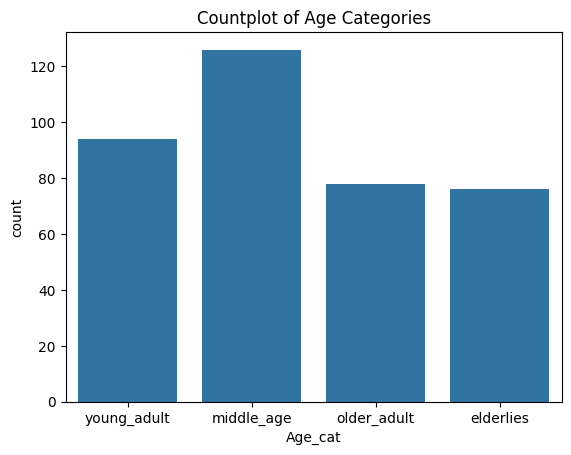

In [7]:
#sns.set_style('dark')
#sns.set_palette("Blues")
#visualization of the Age_cat column
sns.countplot(x='Age_cat',data=sleep_df)
plt.title('Countplot of Age Categories')
plt.show()

In [8]:
#check for duplicates
sleep_df.duplicated().sum()

0

## Exploratory Data Analysis

In [9]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Age_cat
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder,126,83,young_adult
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No disorder,125,80,young_adult
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No disorder,125,80,young_adult
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,young_adult
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,young_adult


In [10]:
sleep_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [11]:
sleep_df.describe(exclude=[np.number])

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder,Age_cat
count,374,374,374,374,374,374
unique,2,11,4,25,3,4
top,Male,Nurse,Normal Weight,130/85,No disorder,middle_age
freq,189,73,195,99,219,126


In [12]:
num = sleep_df.select_dtypes(exclude=['object','category'])
#num.drop('Daily Steps', axis=1, inplace=True)
num

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
0,1,27,6.1,6,42,6,77,4200,126,83
1,2,28,6.2,6,60,8,75,10000,125,80
2,3,28,6.2,6,60,8,75,10000,125,80
3,4,28,5.9,4,30,8,85,3000,140,90
4,5,28,5.9,4,30,8,85,3000,140,90
...,...,...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,75,3,68,7000,140,95
370,371,59,8.0,9,75,3,68,7000,140,95
371,372,59,8.1,9,75,3,68,7000,140,95
372,373,59,8.1,9,75,3,68,7000,140,95


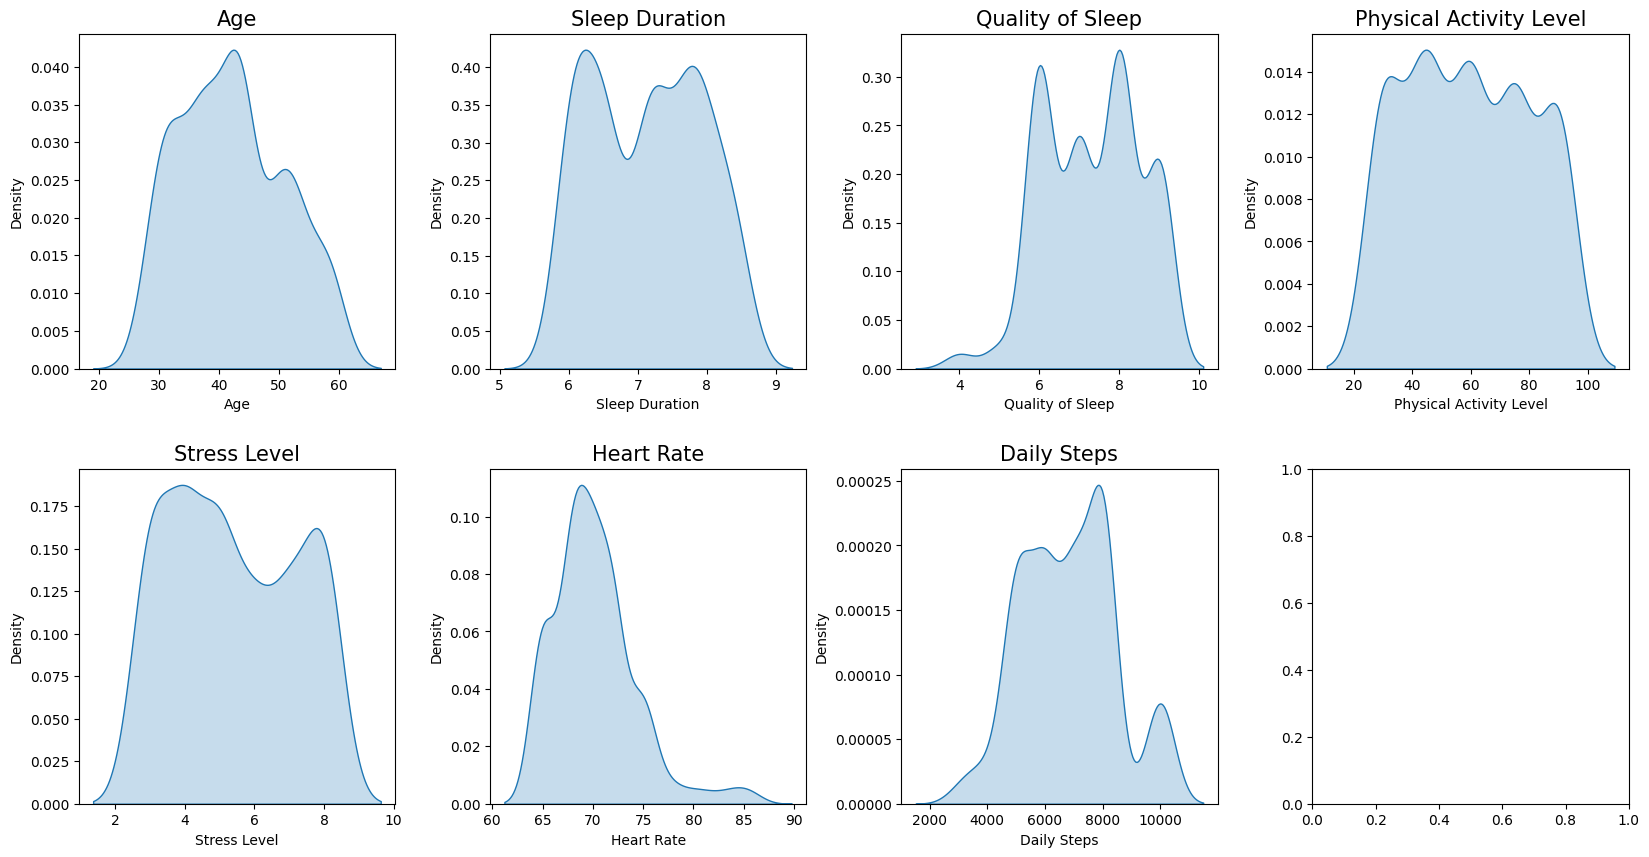

In [13]:
import warnings
warnings.filterwarnings("ignore")

cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# plot data distribution
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()
#sns.set_style('white')
#sns.set_palette("PuRd")

for i, var in enumerate(cols):
    sns.kdeplot(x=var, ax=axs[i], fill=True, data=sleep_df)
    axs[i].set_title(var, fontsize=15)
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()


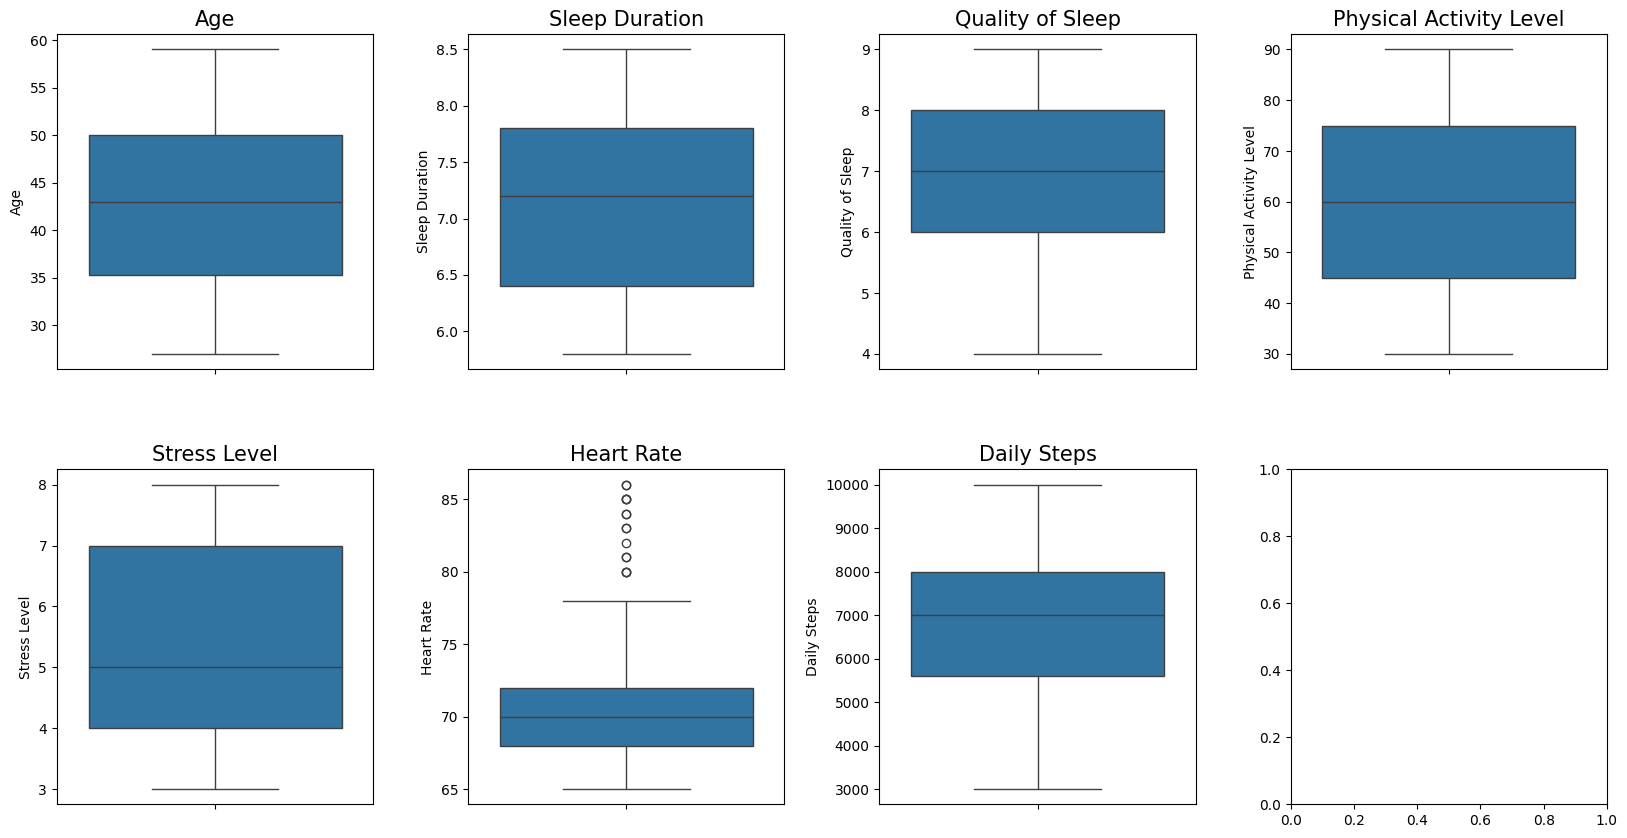

In [14]:
# plot data distribution
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()
#sns.set_style('white')
#sns.set_palette("PuRd")

for i, var in enumerate(cols):
    sns.boxplot(y=var, ax=axs[i], fill=True, data=sleep_df)
    axs[i].set_title(var, fontsize=15)
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

In [15]:
#inspecting outliers

Q1 = sleep_df['Heart Rate'].quantile(0.25)
Q3 = sleep_df['Heart Rate'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = sleep_df['Heart Rate'][(sleep_df['Heart Rate'] < lower_bound) | (sleep_df['Heart Rate'] > upper_bound)]

print(f'Total number of outlier is {outliers.count().sum()}')


Total number of outlier is 15


In [16]:
cat = sleep_df.select_dtypes(exclude=['int64','float64'])
cat.drop('Blood Pressure', axis=1, inplace=True)
cat

,Gender,Occupation,BMI Category,Sleep Disorder,Age_cat
0,Male,Software Engineer,Overweight,No disorder,young_adult
1,Male,Doctor,Normal Weight,No disorder,young_adult
2,Male,Doctor,Normal Weight,No disorder,young_adult
3,Male,Sales Representative,Obese,Sleep Apnea,young_adult
4,Male,Sales Representative,Obese,Sleep Apnea,young_adult
...,...,...,...,...,...
369,Female,Nurse,Overweight,Sleep Apnea,elderlies
370,Female,Nurse,Overweight,Sleep Apnea,elderlies
371,Female,Nurse,Overweight,Sleep Apnea,elderlies
372,Female,Nurse,Overweight,Sleep Apnea,elderlies


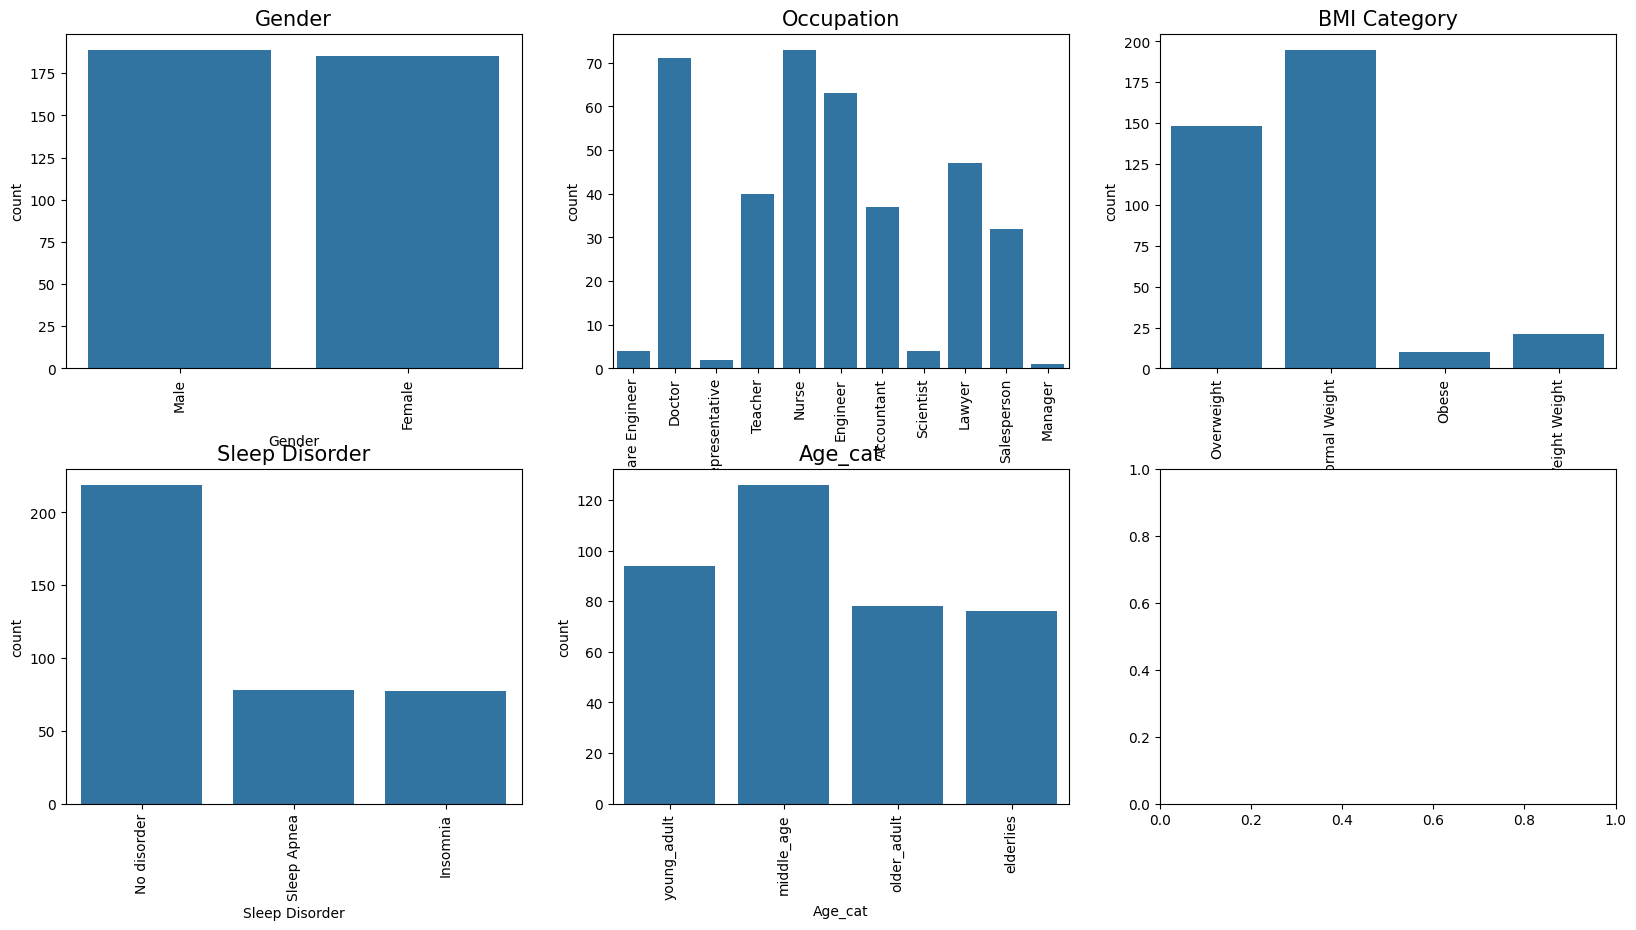

In [17]:
# plot data distribution
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()
#sns.set_style('white')
#sns.set_palette("PuRd")

for i, var in enumerate(cat.columns):
    sns.countplot(x=var, ax=axs[i],  data=cat)
    axs[i].set_title(var, fontsize=15)
    axs[i].tick_params(axis='x', labelrotation=90)
    
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

## 4. Objective Analysis

### 4.1 What is the distribution of sleep duration for each occupation.

In [18]:
#using groupby to get sleep duration summary statistics
sleep_df.groupby('Occupation')['Sleep Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
Accountant,37.0,7.113514,0.312838,6.5,7.10,7.2,7.200,8.0
Doctor,71.0,6.970423,0.863613,6.0,6.05,7.6,7.700,8.2
Engineer,63.0,7.987302,0.511005,6.5,7.70,8.3,8.400,8.5
Lawyer,47.0,7.410638,0.270454,6.9,7.20,7.3,7.700,7.9
Manager,1.0,6.900000,NaN,6.9,6.90,6.9,6.900,6.9
Nurse,73.0,7.063014,0.990301,5.9,6.10,6.5,8.100,8.2
Sales Representative,2.0,5.900000,0.000000,5.9,5.90,5.9,5.900,5.9
Salesperson,32.0,6.403125,0.089747,6.3,6.30,6.4,6.500,6.5
Scientist,4.0,6.000000,0.230940,5.8,5.80,6.0,6.200,6.2


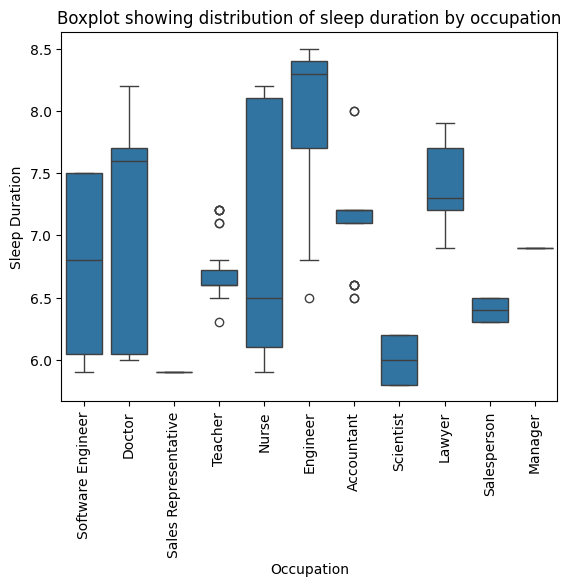

In [19]:
#distribution of sleep duration by occupation
sns.boxplot(x='Occupation', y='Sleep Duration', data=sleep_df)
plt.xticks(rotation=90)
plt.title("Boxplot showing distribution of sleep duration by occupation")
plt.show()


Analyzing sleep duration across various occupations provides insights into how one's profession might influence sleep patterns and its potential connection to sleep disorders. These findings are valuable for insurance companies in identifying clients at risk of sleep disorders.

Using box plots, we can visualize key statistics, including sleep duration at the 25th, 50th, 75th, and 100th percentiles for each occupation.

In our analysis:
- Accountant: Mean sleep duration of 7.11 hours with low variability.
- Doctor: Mean sleep duration of 6.97 hours with slightly more variability.
- Engineer: Mean sleep duration of 7.99 hours with moderate variability.
- Lawyer: Mean sleep duration of 7.41 hours with low variability.
- Manager: Only one data point with a sleep duration of 6.9 hours.
- Nurse: Mean sleep duration of 7.06 hours with higher variability.
- Sales Representative: Only two data points, both with a sleep duration of 5.9 hours.
- Salesperson: Mean sleep duration of 6.40 hours with low variability.
- Scientist: Mean sleep duration of 6 hours with small variability.
- Software Engineer: Mean sleep duration of 6.75 hours with moderate variability.
- Teacher: Mean sleep duration of 6.69 hours with small variability.

This analysis enhances our understanding of how different professions influence sleep patterns, aiding in the identification of potential sleep disorder risks.

### 4.2 What is the distribution of quality of sleep for each occupation.

In [20]:
#using groupby to get sleep quality summary statistics
sleep_df.groupby('Occupation')['Quality of Sleep'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
Accountant,37.0,7.891892,0.458487,7.0,8.0,8.0,8.0,9.0
Doctor,71.0,6.647887,0.757790,6.0,6.0,7.0,7.0,9.0
Engineer,63.0,8.412698,0.754234,5.0,8.0,9.0,9.0,9.0
Lawyer,47.0,7.893617,0.311661,7.0,8.0,8.0,8.0,8.0
Manager,1.0,7.000000,NaN,7.0,7.0,7.0,7.0,7.0
Nurse,73.0,7.369863,1.550151,5.0,6.0,6.0,9.0,9.0
Sales Representative,2.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
Salesperson,32.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
Scientist,4.0,5.000000,1.154701,4.0,4.0,5.0,6.0,6.0


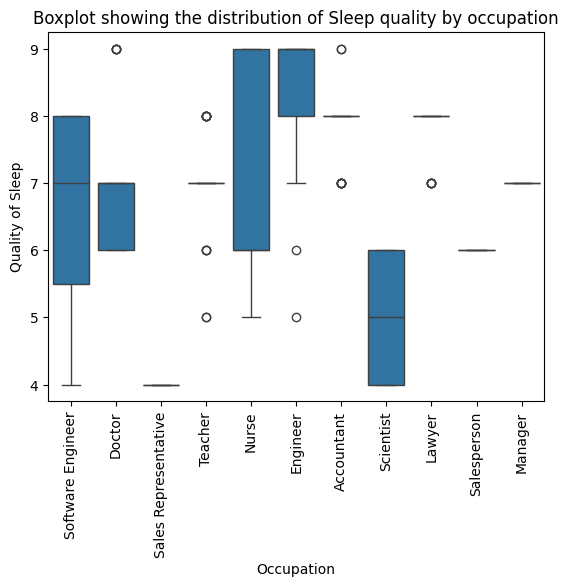

In [21]:
#distribution of Quality of Sleep by occupation
sns.boxplot(x='Occupation', y='Quality of Sleep', data=sleep_df)
plt.xticks(rotation=90)
plt.title("Boxplot showing the distribution of Sleep quality by occupation")
plt.show()

Analyzing the distribution of sleep quality across various occupations provides valuable insights into the impact of one's chosen profession on their sleep patterns. Additionally, this analysis can prove beneficial to health insurance companies in identifying potential clients at risk of sleep disorders.

One highly effective method for visualizing the distribution of sleep quality among different occupational groups is through the use of boxplots. These graphical representations allow us to grasp the spread of data across various quantiles of our dataset, shedding light on the nuances of sleep quality within each profession.

Interpreting the information gleaned from these boxplots, we can draw several noteworthy conclusions:

- **Engineers:** Engineers, on average, enjoy the highest sleep quality, with an average duration of approximately 8.41 hours. Furthermore, this group exhibits minimal variability in sleep quality, as indicated by their low standard deviation.

- **Doctors:** Doctors maintain a mean sleep quality of approximately 6.65 hours, showing a moderate level of variation (standard deviation of roughly 0.76). This suggests a somewhat more diverse sleep pattern within this occupation.

- **Nurses:** Nurses exhibit a broader range of sleep quality, with a mean duration of around 7.37 hours. Notably, the standard deviation is approximately 1.55, highlighting a greater degree of variability in sleep quality within this group.

- **Sales Representatives:** Although data for this occupation is limited, the available information suggests a mean sleep quality of 4 hours, with no discernible variability (standard deviation of 0). 

- **Scientists:** Scientists report an average sleep quality of 5 hours. However, this mean is influenced by a relatively high standard deviation of about 1.15, indicating more significant variation in sleep durations.

These sleep quality statistics for each occupation offer valuable insights into both the central tendencies and the extent of variability within these professional groups. Consequently, this analysis contributes to a more comprehensive understanding of sleep patterns across different occupations, benefiting various stakeholders, including individuals and health insurance companies.

## 4.3 Does an increased physical activity level result in a better quality of sleep.

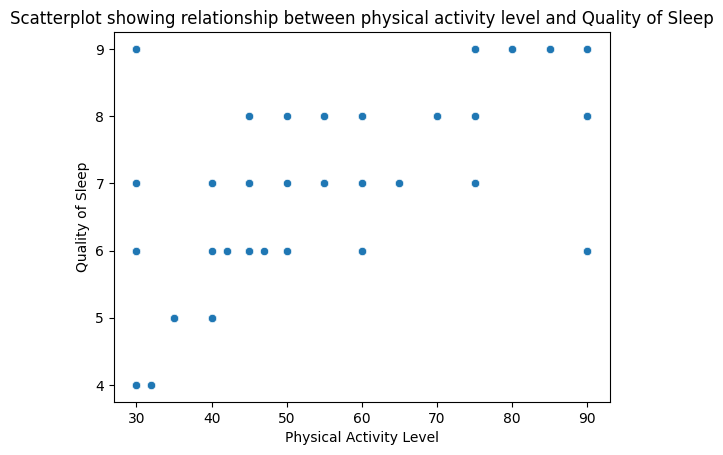

In [22]:
#Does an increased physical activity level result in a better quality of sleep?
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=sleep_df)
plt.title("Scatterplot showing relationship between physical activity level and Quality of Sleep")
plt.show()

null hypothesis (H0) : there is no significant difference in the quality of sleep between these two groups, 
alternative hypothesis (H1) :there is a significant difference,(indicating that increased physical activity leads to better sleep quality)

Significance level: 0.05

In [23]:
df = sleep_df[['Quality of Sleep', 'Physical Activity Level']]


print(df['Physical Activity Level'].unique())

print ("------------------------------------")

print(df['Physical Activity Level'].describe())

group_A = df[df["Physical Activity Level"] >= 60]

group_B = df[~(df["Physical Activity Level"] >= 60)]



[42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
------------------------------------
count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64


In [24]:
import scipy.stats as stats

# Sample data 
group_A_sleep_quality = group_A['Quality of Sleep']
group_B_sleep_quality = group_B['Quality of Sleep']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_A_sleep_quality, group_B_sleep_quality)

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sleep quality.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sleep quality.")


Reject the null hypothesis: There is a significant difference in sleep quality.


The scatter plot presented above reveals a positive correlation between an individual's physical activity level and the quality of sleep they receive. It's evident that as the level of physical activity increases, the quality of sleep also demonstrates an upward trend.

To delve deeper into the relationship between these variables, a hypothesis test was conducted using the scipy ttest_ind method. This test aimed to determine if a statistically significant difference exists in sleep quality between two distinct groups of data:

- Group_A: Comprising clients with a physical activity level of 60 or higher.
- Group_B: Consisting of clients with a physical activity level below 60.

The hypotheses tested were as follows:
- Null Hypothesis (H0): There is no significant difference in sleep quality between these two groups.
- Alternative Hypothesis (H1): There is a significant difference, suggesting that increased physical activity is associated with better sleep quality.

Upon completing the hypothesis test, the results led to the rejection of the null hypothesis. This signifies that a statistically significant difference exists in sleep quality between the two categories of physical activity. In conclusion, increased physical activity appears to be linked to improved sleep quality.


## 4.4 Does the presence of a sleep disorder affect the subjective sleep quality metric.

In [25]:
sleep_df.groupby('Sleep Disorder')['Quality of Sleep'].describe()

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,6.532468,0.804337,4.0,6.0,7.0,7.0,9.0
No disorder,219.0,7.625571,0.975142,6.0,7.0,8.0,8.0,9.0
Sleep Apnea,78.0,7.205128,1.646397,4.0,6.0,6.0,9.0,9.0


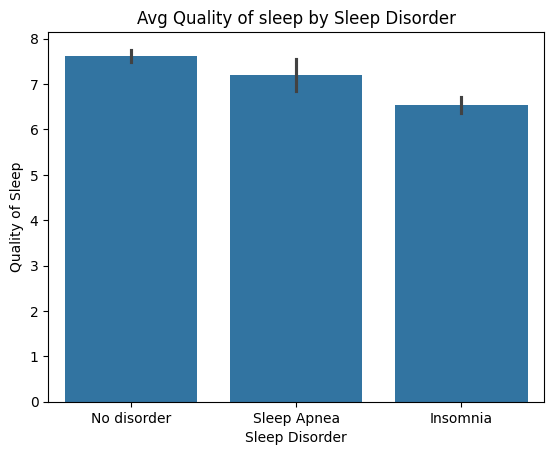

In [26]:
sns.barplot(x='Sleep Disorder', y='Quality of Sleep', data=sleep_df)
plt.title("Avg Quality of sleep by Sleep Disorder")
sns.set_palette('Blues')
plt.show()

null hypothesis (H0): there is no significant difference in subjective sleep quality scores among these three groups,  alternative hypothesis (H1) : there is a significant difference.

significant value : 0.05

In [27]:
#Does the presence of a sleep disorder affect the subjective sleep quality metric?
# Import the required library
import pingouin

# Perform the ANOVA test
anova_df = pingouin.anova(data=sleep_df, dv='Quality of Sleep', between='Sleep Disorder')

# Extract the p-value from the ANOVA results
p_value = anova_df.loc[0, 'p-unc']

# Check if the p-value is less than your chosen significance level (e.g., 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference in subjective sleep quality among the groups.")
else:
    print("There is no statistically significant difference in subjective sleep quality among the groups.")

There is a statistically significant difference in subjective sleep quality among the groups.


The analysis of both the table and bar graph offers valuable insights into the quality of sleep across different sleep disorder groups. Let's examine the key findings for each group:

**Insomnia Group:**
- The average quality of sleep is approximately 6.53.
- Sleep quality within this group exhibits a moderate standard deviation of around 0.80.
- The range of sleep quality varies from 4.0 to 9.0.
- Approximately 25% of individuals in this group experience sleep quality scores below 6.0, while the remaining 75% report values up to 7.0.

**No Disorder Group:**
- The "No Disorder" group is the most extensive, comprising a significant number of records.
- The average sleep quality for this group is approximately 7.63, slightly higher than the "Insomnia" group.
- Sleep quality within this group spans from 6.0 to 9.0.
- The median sleep quality score is 8.0, implying that 50% of individuals in this group report sleep quality at or above this value.

**Sleep Apnea Group:**
- The "Sleep Apnea" group exhibits an average sleep quality of about 7.21.
- Sleep quality within this group is characterized by a relatively higher standard deviation of approximately 1.65, indicating substantial variation.
- The range of sleep quality in this group extends from 4.0 to 9.0.
- About 25% of individuals in this group experience sleep quality scores lower than 6.0.

In summary, this data offers valuable insights into sleep quality among various groups with distinct sleep disorders. The "No Disorder" group tends to have the highest average sleep quality, while the "Insomnia" group, although slightly lower on average, shows less variability. On the other hand, the "Sleep Apnea" group exhibits the greatest variability in sleep quality scores, encompassing a wide range.

To further explore the relationship between these variables, an analysis of variance (ANOVA) test was conducted using sleep quality as the dependent variable. The results indicate a statistically significant difference in subjective sleep quality among the groups, highlighting the importance of sleep disorders in shaping individuals' sleep experiences.

## 4.5 Whats the link between age and sleep duration.

In [28]:
sleep_df.groupby('Age_cat')['Sleep Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Age_cat,,,,,,,,
young_adult,94.0,6.854255,0.788174,5.8,6.1,6.7,7.7,7.9
middle_age,126.0,7.243651,0.435154,6.1,7.1,7.2,7.7,8.0
older_adult,78.0,6.421795,0.454029,5.9,6.1,6.3,6.6,8.3
elderlies,76.0,8.019737,0.640421,6.0,8.0,8.2,8.4,8.5


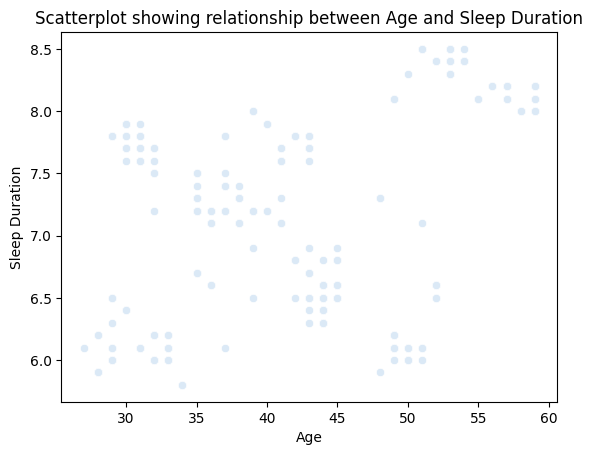

In [29]:
sns.scatterplot(x='Age', y='Sleep Duration', data=sleep_df)
plt.title("Scatterplot showing relationship between Age and Sleep Duration")
plt.show()

The data presented in the table summarizes the quality of sleep scores across different age categories. 

**Young Adults (Age Category: young_adult):**
- The "young_adult" group comprises 94 records.
- The average quality of sleep in this group is approximately 6.85.
- Sleep quality within this group exhibits a moderate standard deviation of about 0.79, indicating some variation.
- The range of sleep quality scores for young adults spans from 5.8 to 7.9.
- Around 25% of young adults have sleep quality scores below 6.1, while 75% have scores up to 7.7.

**Middle-Aged Adults (Age Category: middle_age):**
- The "middle_age" group is the largest, with 126 records.
- This group reports an average sleep quality score of approximately 7.24.
- The standard deviation for sleep quality in middle-aged adults is relatively low at around 0.44, suggesting less variation.
- Sleep quality within this group ranges from 6.1 to 8.0.
- The median (50th percentile) sleep quality score is 7.2.

**Older Adults (Age Category: older_adult):**
- The "older_adult" group consists of 78 records.
- The average sleep quality score for this group is about 6.42.
- Sleep quality in this category shows a moderate standard deviation of around 0.45.
- The range of sleep quality scores for older adults extends from 5.9 to 8.3.
- Approximately 25% of older adults have sleep quality scores below 6.1, and 75% have scores up to 6.6.

**Elderlies (Age Category: elderlies):**
- The "elderlies" group includes 76 records.
- This group reports the highest average sleep quality score of approximately 8.02.
- Sleep quality in the elderlies group displays a moderate standard deviation of about 0.64.
- Sleep quality scores for elderlies range from 6.0 to 8.5.
- The median (50th percentile) sleep quality score is 8.2.

In summary, the data provides insights into the quality of sleep across different age categories. Middle-aged adults have the highest average sleep quality, with relatively low variability. On the other hand, elderlies report the highest average sleep quality, albeit with slightly more variability. Young adults and older adults fall in between, with their sleep quality averages and variability falling within those of the other groups.

These statistics can be valuable for understanding sleep patterns and quality of sleep among individuals of varying age groups.

## 4.6 What factors can contribute to a sleep disorder.

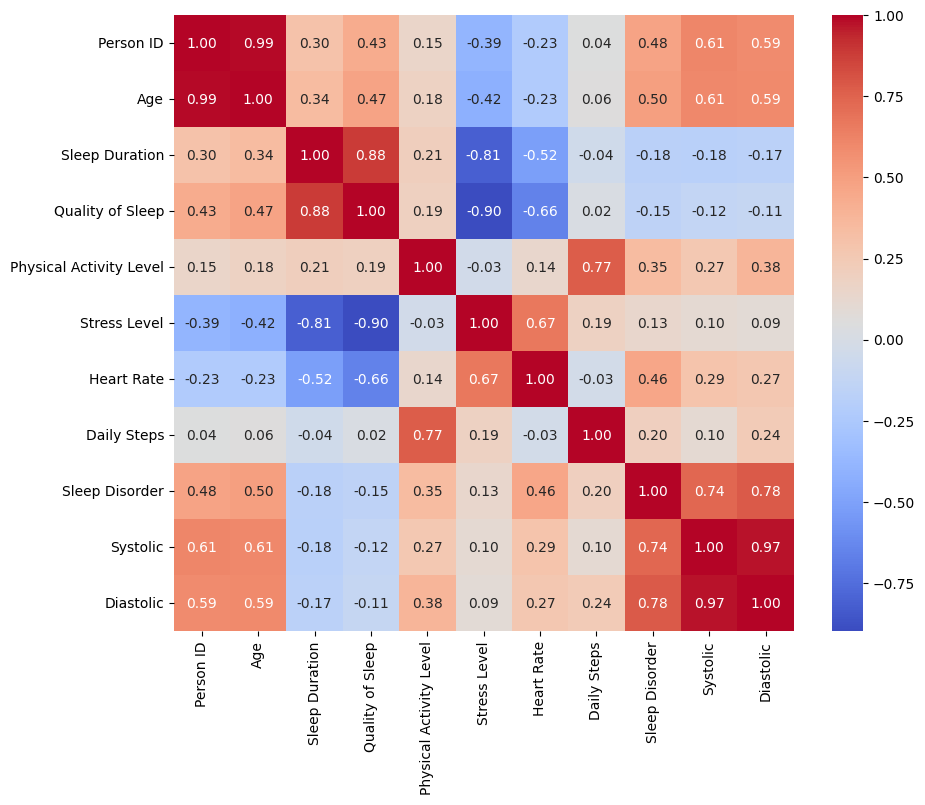

In [30]:
sleep_df['Sleep Disorder']  = sleep_df['Sleep Disorder'].map({'No disorder': 0, 'Sleep Apnea':1, 'Insommia': 2})
numeric_df = sleep_df.select_dtypes(include=['number'])
numeric_corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

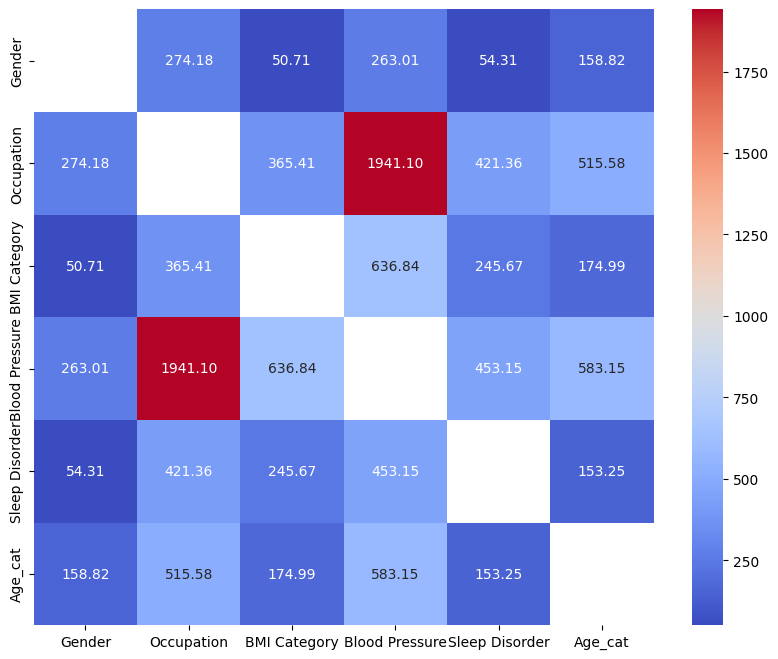

In [33]:
from scipy.stats import chi2_contingency
categorical_df = sleep_df.select_dtypes(exclude=['number'])
# Assuming 'categorical_df' contains only categorical variables
chi2_matrix = pd.DataFrame(index=categorical_df.columns, columns=categorical_df.columns)

for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(categorical_df[col1], categorical_df[col2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            chi2_matrix.loc[col1, col2] = chi2

# Visualize the chi-squared matrix
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


**The heatmap above shows occupation and Blood pressure , Age, and Heart Rateas top factors contributing to Sleep Disorder**

## Further Analysis

### Analyzing Sleep Disorders 

#### Sleep Disoders and Age

In [39]:
#ranking sleep disorder by age group
age_group = sleep_df.groupby(['Age_cat', 'Sleep Disorder']).size().reset_index(name='counts')
#age_group

pivot_table = pd.pivot_table(age_group, index='Sleep Disorder',
                            columns='Age_cat',
                            values='counts').rank(ascending=False, axis=0)
pivot_table

Age_cat,young_adult,middle_age,older_adult,elderlies
Sleep Disorder,,,,
Insomnia,3.0,2.0,1.0,3.0
No disorder,1.0,1.0,3.0,1.0
Sleep Apnea,2.0,3.0,2.0,2.0


In [40]:
def color_rank_one(val):
    '''This function applies the mediumturquoise background color to the first rank'''
    if val == 1:
        return "background-color: mediumturquoise"
    else:
        return ''
    
pivot_table.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

Age_cat,young_adult,middle_age,older_adult,elderlies
Sleep Disorder,,,,
Insomnia,3,2,1,3
No disorder,1,1,3,1
Sleep Apnea,2,3,2,2


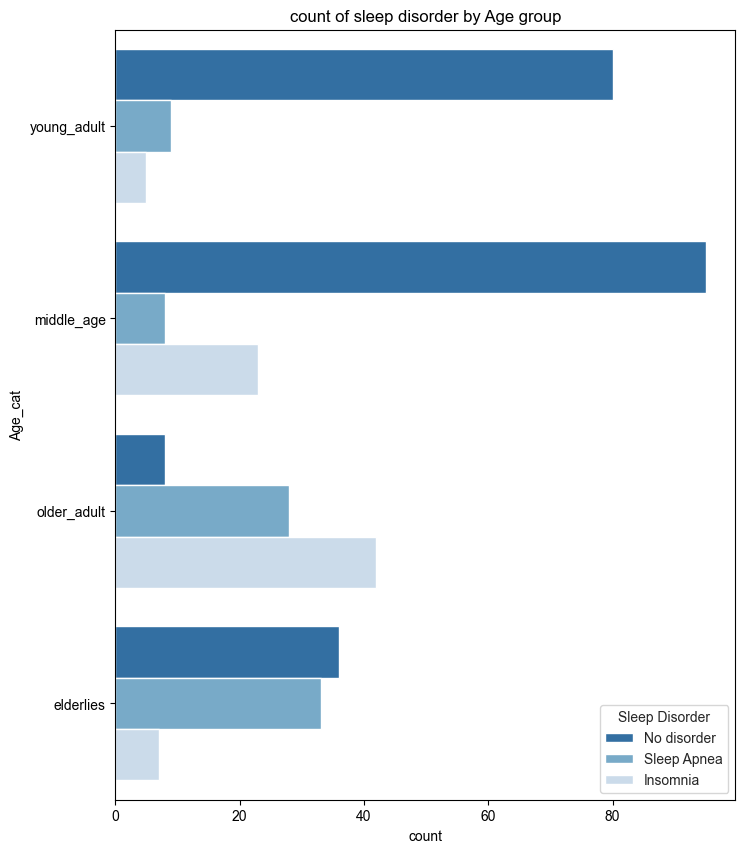

In [41]:
#plot sleep disorder by age group
fig,ax = plt.subplots(figsize=(8,10))
sns.set_style('white')

sleep_disorder = sleep_df[sleep_df['Sleep Disorder'] != 'Missing']
unique_sleepdisorder = sleep_disorder["Sleep Disorder"].unique()

blues = sns.color_palette("Blues", n_colors=len(unique_sleepdisorder))
custom_palette = ['mediumturquoise' if diag == "Insommia"
                 else blues[len(unique_sleepdisorder) - 1 -i]
                 for i, diag in enumerate(unique_sleepdisorder)]

sns.countplot(y='Age_cat',
             hue='Sleep Disorder',order=sleep_disorder.Age_cat.sort_values().unique(),
             data = sleep_disorder,
             palette = custom_palette)
plt.title("count of sleep disorder by Age group")
plt.show()

### 5. EDA on Sleep Disorders and Categorical columns

### 5.1 Table Analysis

In [42]:
#Table Sleep disorder vs gender
table_1 = (sleep_df.groupby('Gender')['Sleep Disorder']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='Sleep disorder rate (%)'))


#Table Sleep disorder vs Occupation
table_2 = (sleep_df.groupby('Occupation')['Sleep Disorder']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='Sleep disorder rate (%)'))


#Table Sleep disorder vs BMI Category
table_3 = (sleep_df.groupby('BMI Category')['Sleep Disorder']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='Sleep disorder rate (%)'))


#Table Sleep disorder vs Blood Pressure
table_4 = (sleep_df.groupby('Blood Pressure')['Sleep Disorder']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='Sleep disorder rate (%)'))


#Table Sleep disorder vs Daily Steps
table_5 = (sleep_df.groupby('Daily Steps')['Sleep Disorder']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='Sleep disorder rate (%)'))


#Table Sleep disorder vs Physical Activity Level
table_6 = (sleep_df.groupby('Physical Activity Level')['Sleep Disorder']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='Sleep disorder rate (%)'))


#Table Sleep disorder vs Heart Rate
table_7 = (sleep_df.groupby('Heart Rate')['Sleep Disorder']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='Sleep disorder rate (%)'))


In [43]:
table_1

,Gender,Sleep Disorder,Sleep disorder rate (%)
0,Female,No disorder,44.0
1,Female,Sleep Apnea,36.0
2,Female,Insomnia,19.0
3,Male,No disorder,72.0
4,Male,Insomnia,22.0
5,Male,Sleep Apnea,6.0


In [44]:
table_2

,Occupation,Sleep Disorder,Sleep disorder rate (%)
0,Accountant,No disorder,81.0
1,Accountant,Insomnia,19.0
2,Doctor,No disorder,90.0
3,Doctor,Sleep Apnea,6.0
4,Doctor,Insomnia,4.0
5,Engineer,No disorder,90.0
6,Engineer,Insomnia,8.0
7,Engineer,Sleep Apnea,2.0
8,Lawyer,No disorder,89.0
9,Lawyer,Sleep Apnea,6.0


In [45]:
table_3

,BMI Category,Sleep Disorder,Sleep disorder rate (%)
0,Normal Weight,No disorder,94.0
1,Normal Weight,Insomnia,4.0
2,Normal Weight,Sleep Apnea,3.0
3,Normal Weight Weight,No disorder,81.0
4,Normal Weight Weight,Insomnia,10.0
5,Normal Weight Weight,Sleep Apnea,10.0
6,Obese,Sleep Apnea,60.0
7,Obese,Insomnia,40.0
8,Overweight,Sleep Apnea,44.0
9,Overweight,Insomnia,43.0


In [46]:
table_4

,Blood Pressure,Sleep Disorder,Sleep disorder rate (%)
0,115/75,No disorder,94.0
1,115/75,Insomnia,3.0
2,115/75,Sleep Apnea,3.0
3,115/78,No disorder,100.0
4,117/76,No disorder,100.0
5,118/75,No disorder,100.0
6,118/76,No disorder,100.0
7,119/77,No disorder,100.0
8,120/80,No disorder,96.0
9,120/80,Sleep Apnea,4.0


In [47]:
table_5

,Daily Steps,Sleep Disorder,Sleep disorder rate (%)
0,3000,Sleep Apnea,67.0
1,3000,Insomnia,33.0
2,3300,Sleep Apnea,100.0
3,3500,Insomnia,100.0
4,3700,Sleep Apnea,100.0
5,4000,Insomnia,67.0
6,4000,Sleep Apnea,33.0
7,4100,Insomnia,50.0
8,4100,Sleep Apnea,50.0
9,4200,No disorder,100.0


In [48]:
table_6

,Physical Activity Level,Sleep Disorder,Sleep disorder rate (%)
0,30,No disorder,88.0
1,30,Insomnia,7.0
2,30,Sleep Apnea,4.0
3,32,Sleep Apnea,100.0
4,35,Insomnia,50.0
5,35,Sleep Apnea,50.0
6,40,Insomnia,50.0
7,40,No disorder,33.0
8,40,Sleep Apnea,17.0
9,42,No disorder,100.0


In [49]:
table_7

,Heart Rate,Sleep Disorder,Sleep disorder rate (%)
0,65,No disorder,61.0
1,65,Insomnia,39.0
2,67,No disorder,100.0
3,68,No disorder,66.0
4,68,Sleep Apnea,32.0
5,68,Insomnia,2.0
6,69,No disorder,100.0
7,70,No disorder,92.0
8,70,Insomnia,4.0
9,70,Sleep Apnea,4.0


### 5.2 Visualization Analysis

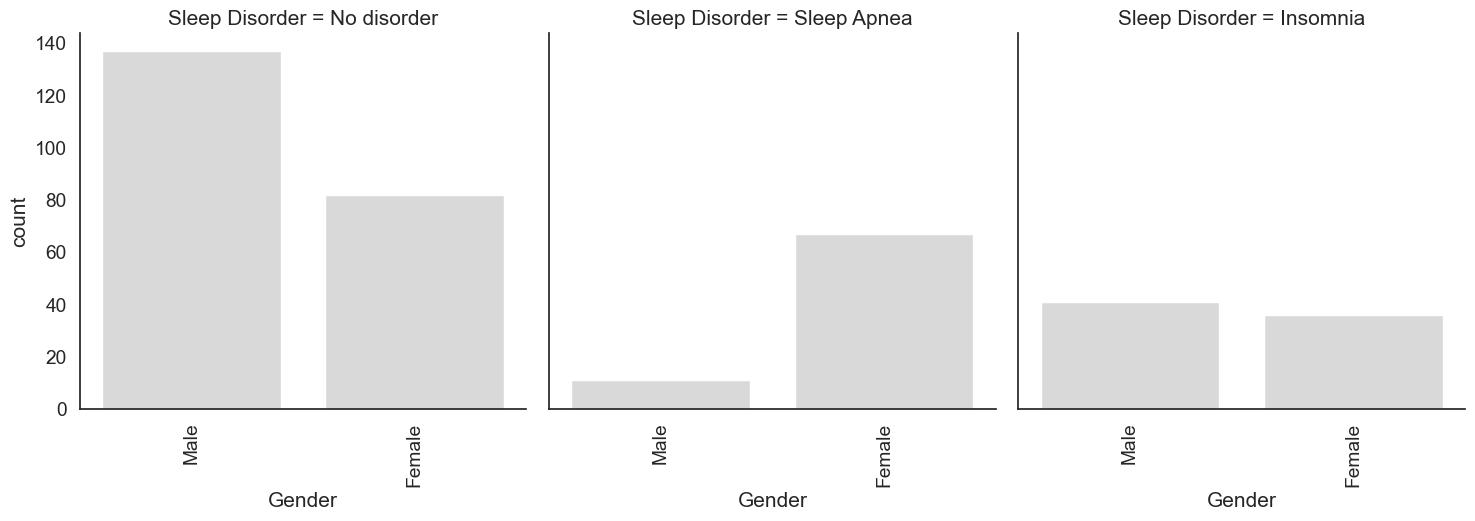

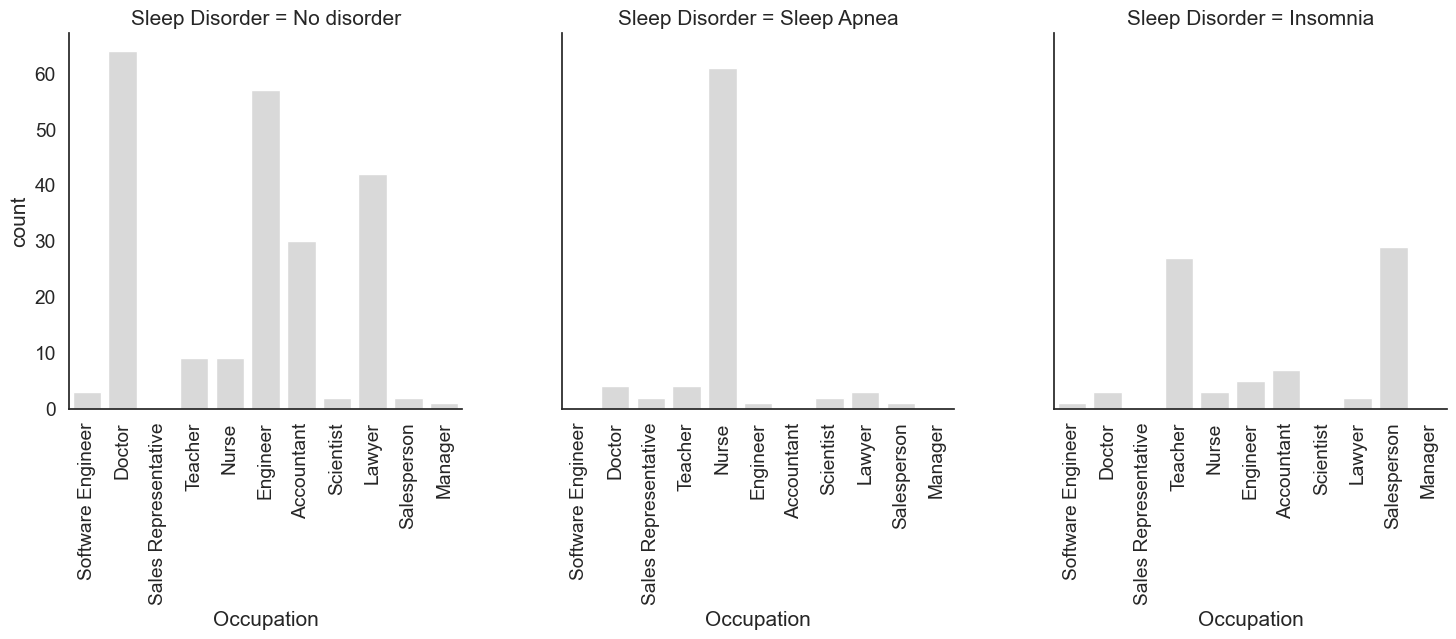

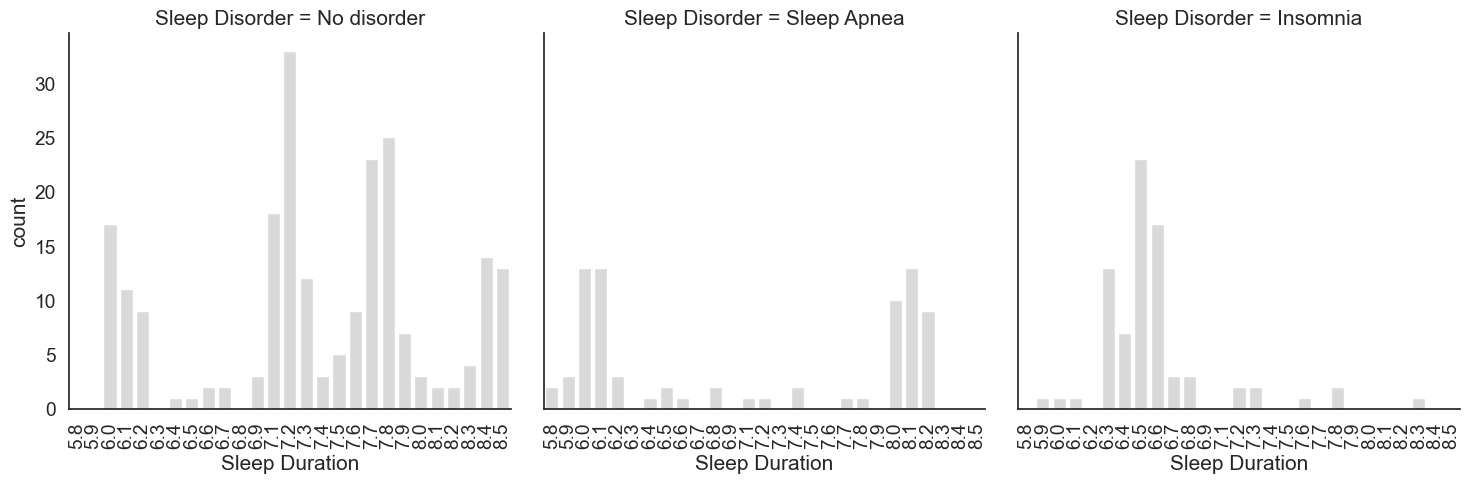

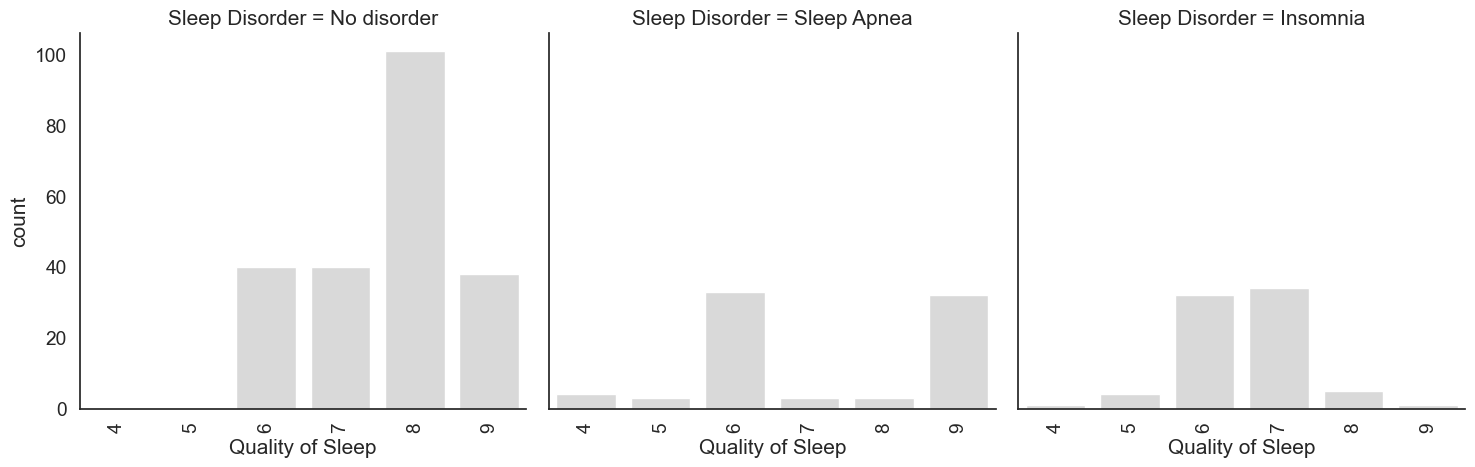

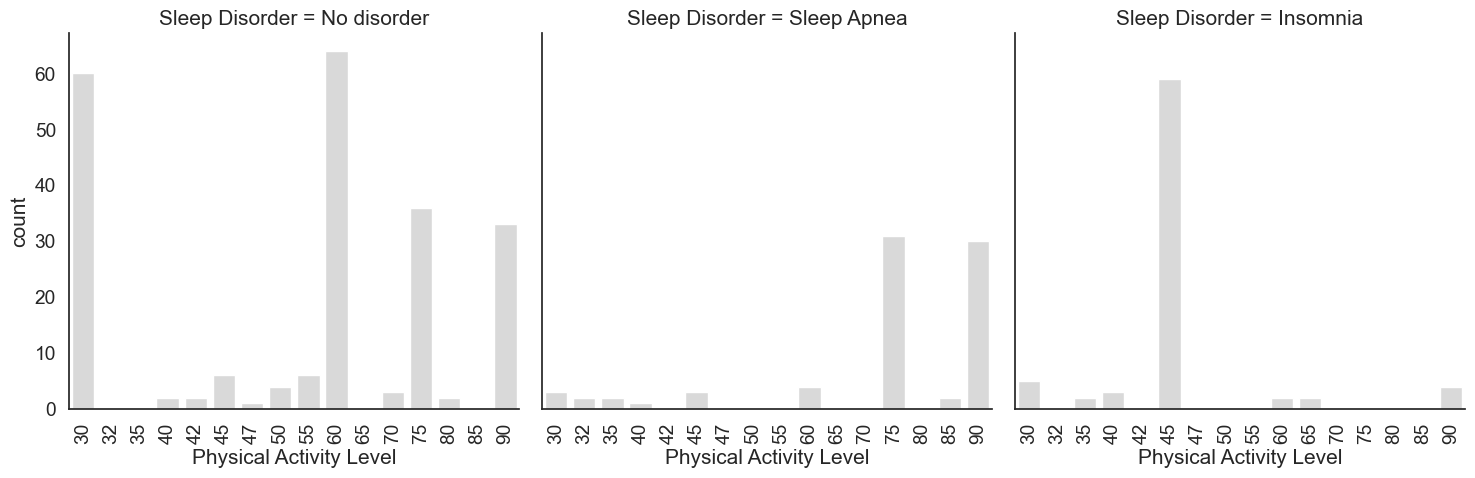

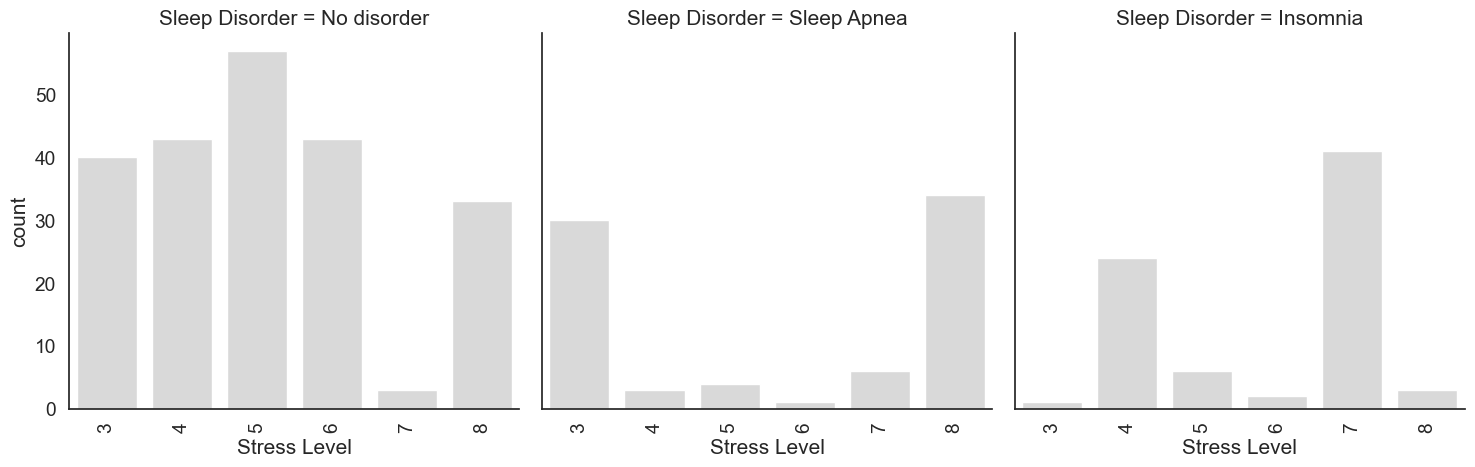

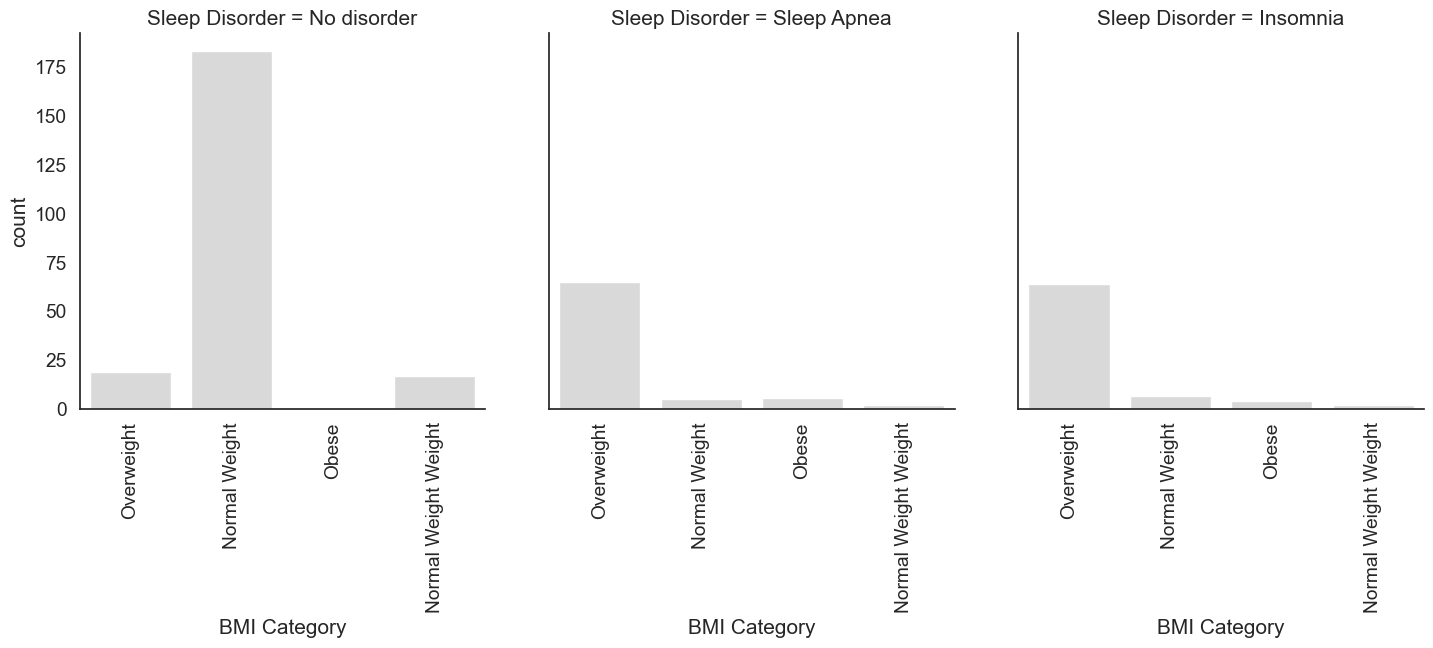

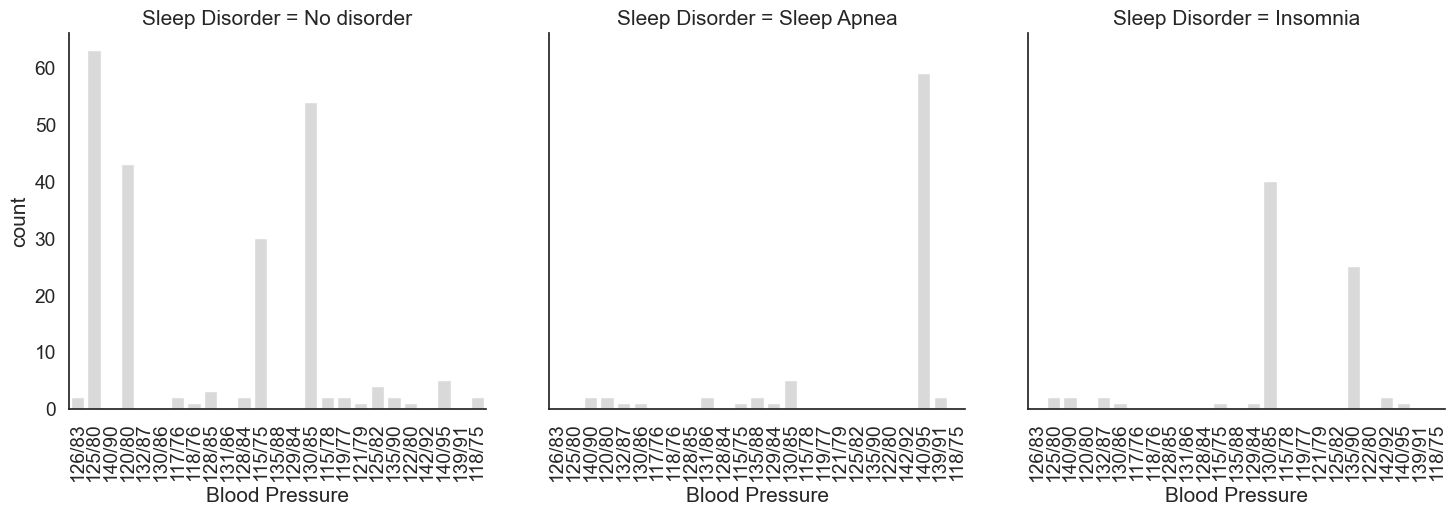

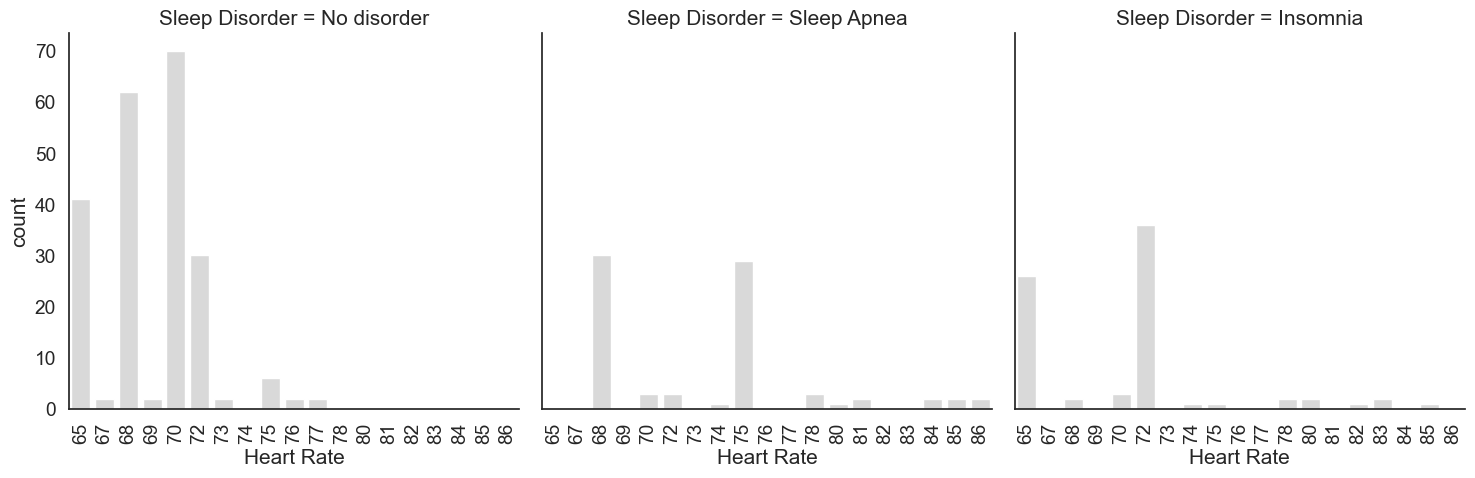

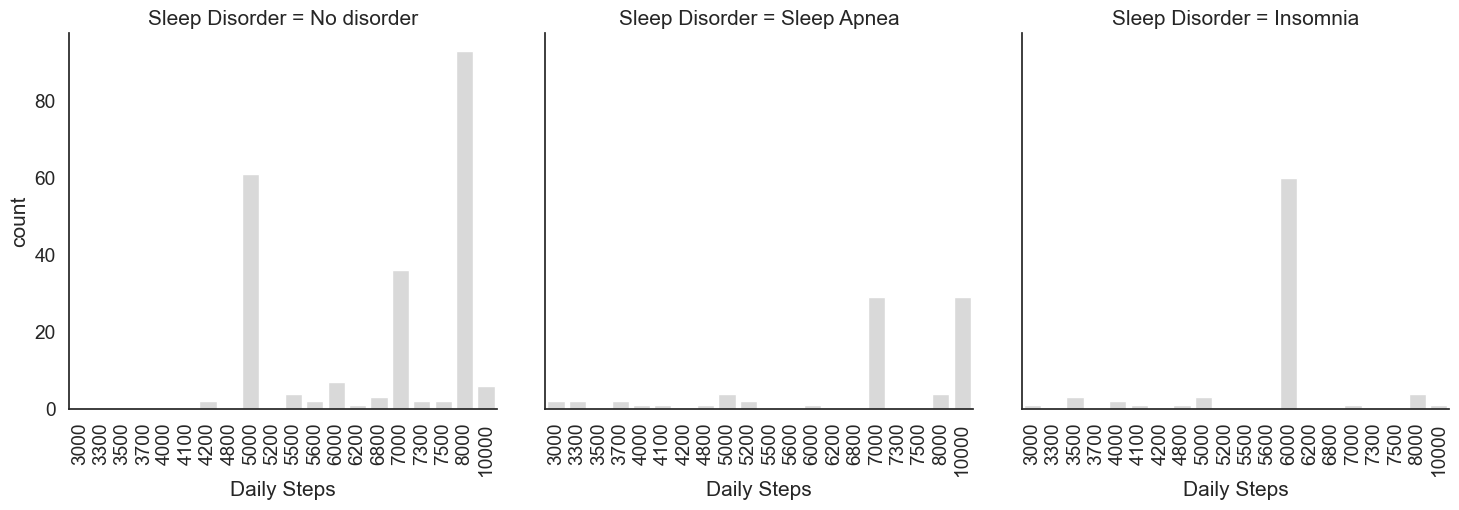

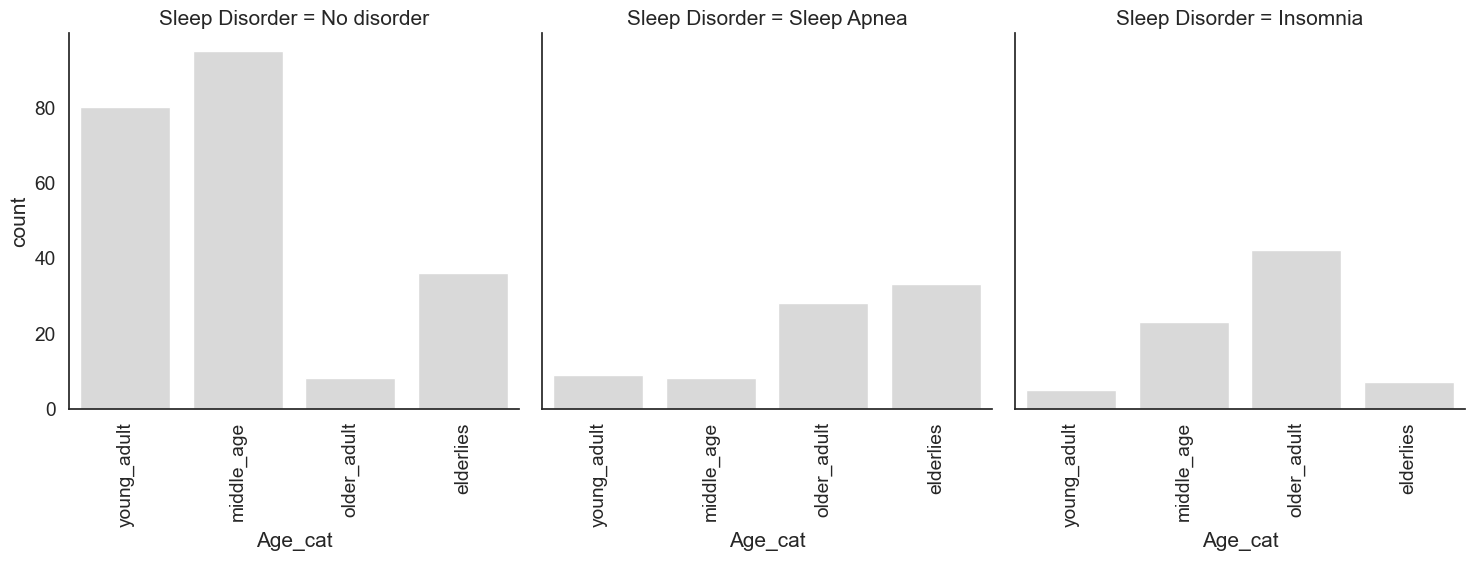

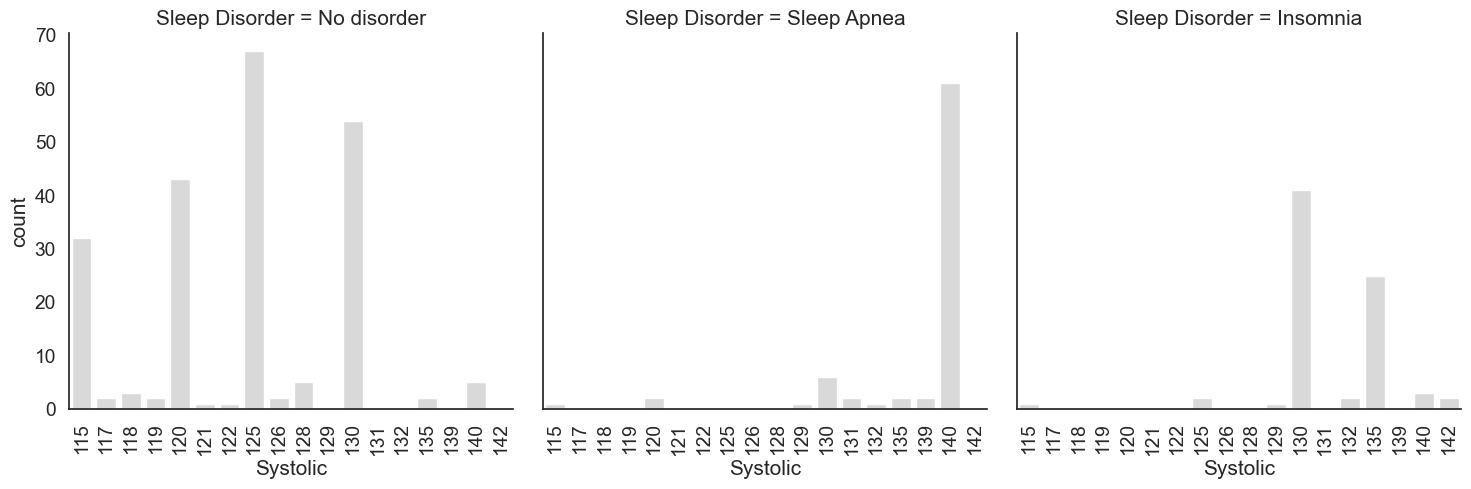

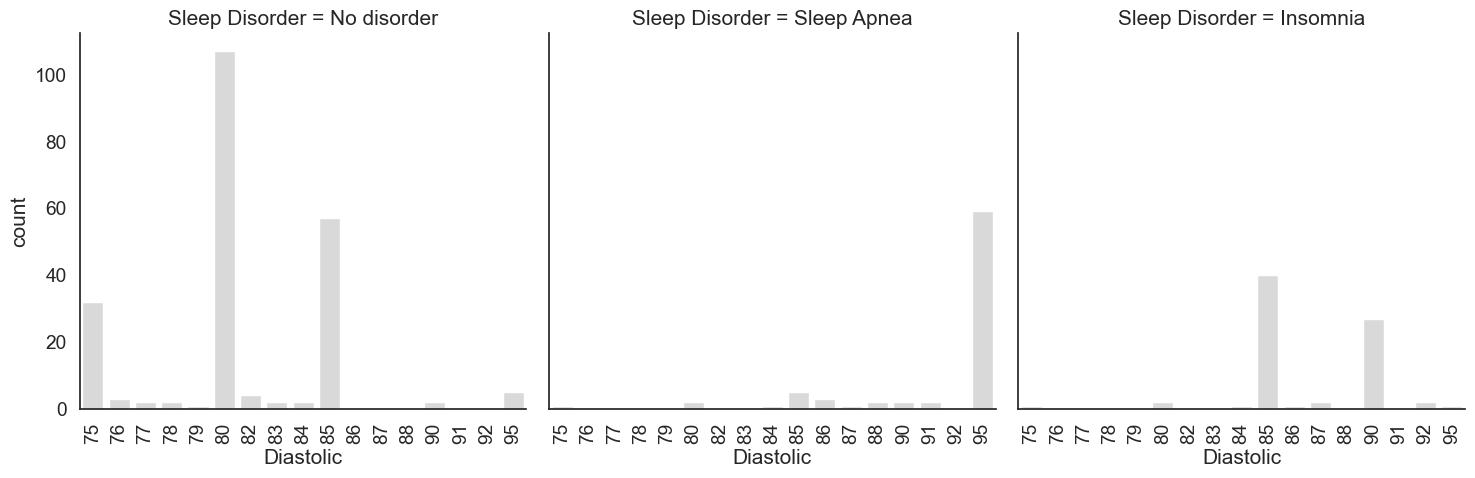

In [50]:
cols = sleep_df.columns
cols = [col for col in cols if col not in ['Person ID', 'Sleep Disorder', 'Age']]


sns.set(style='white',font_scale=1.25)
sns.set_palette('Greys',3)

def plot_bar_graph():
    for c in cols:
        g = sns.catplot(x=c, col='Sleep Disorder', data=sleep_df, kind='count')
        g.set_xticklabels(rotation=90)
        #plt.title(c)
        plt.show()

plot_bar_graph()

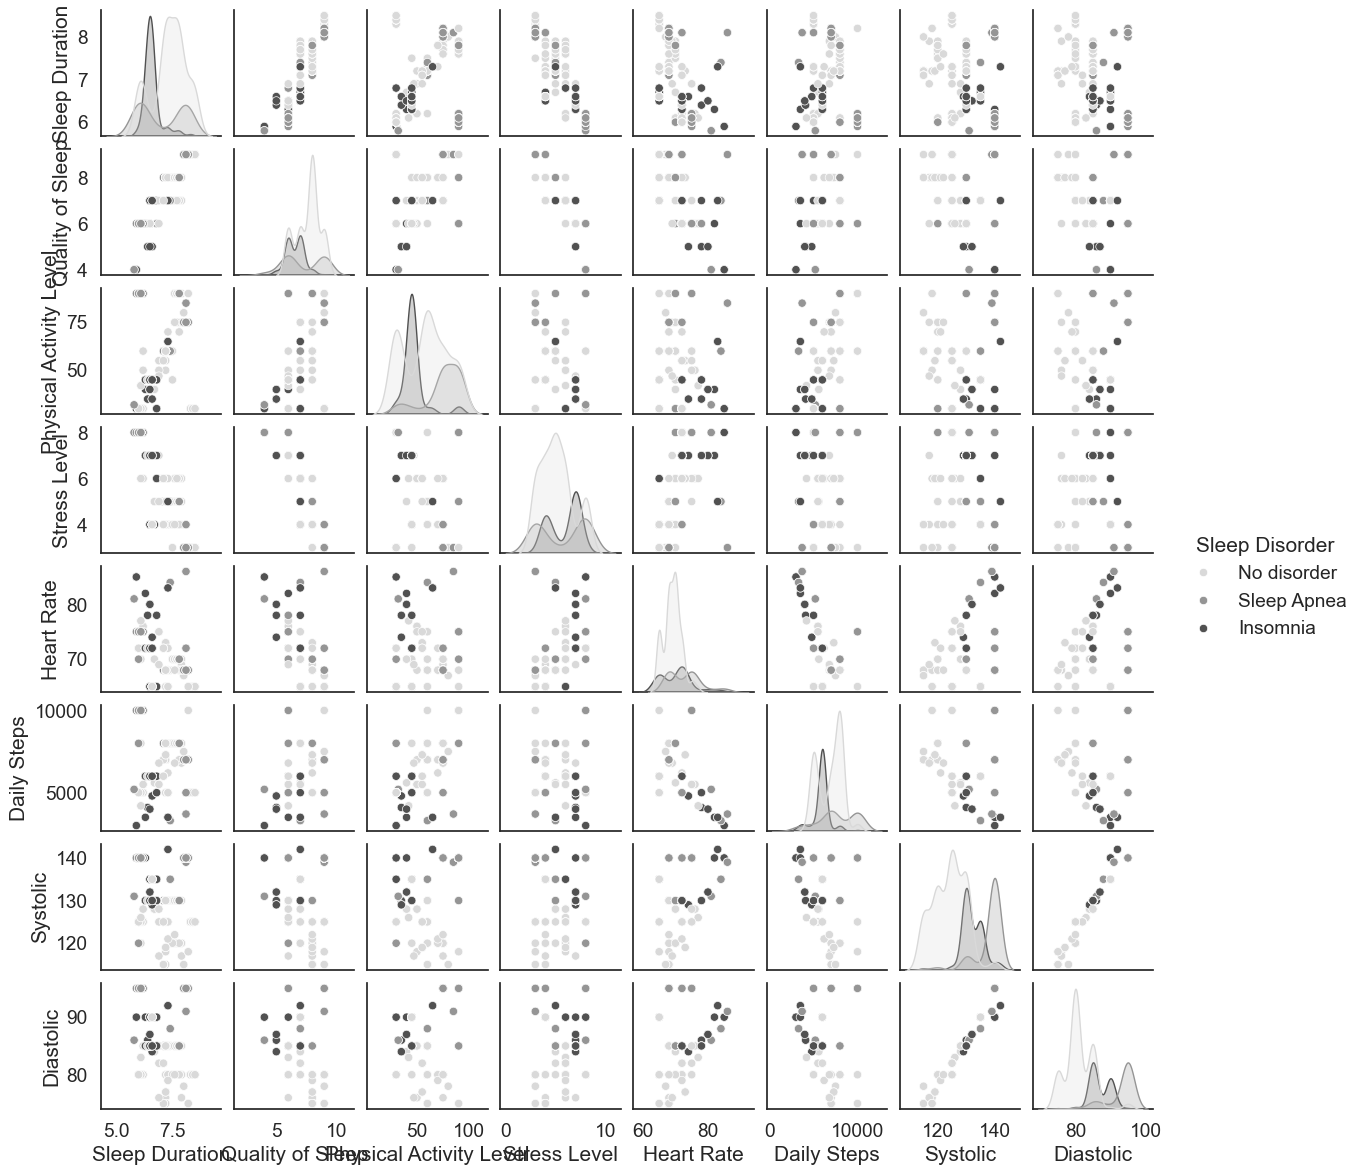

In [51]:
sns.pairplot(sleep_df.drop(['Person ID', 'Age','Blood Pressure'], axis=1), hue='Sleep Disorder', size=1.5, diag_kind='kde')
plt.xticks(rotation=90)
plt.show()
#show.set(xticklabels=[])

## Preprocessing of Data for Machine Learning

In [50]:
#checking shape of the resample dataset
sleep_df_weight.shape

(374, 17)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

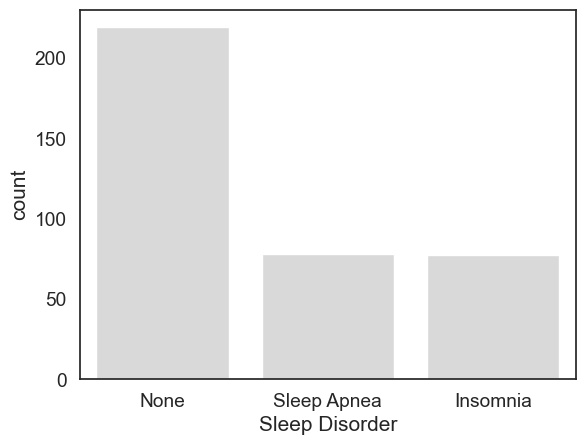

In [45]:
#checking class balance
sns.countplot(x='Sleep Disorder', data=sleep_df)

In [49]:
#creating a resampled data set to use for modelling
#using weighted random sampling to balance the data class imbalance

condition = (sleep_df['Sleep Disorder'] == 'Sleep Apnea' ) | (sleep_df['Sleep Disorder'] == 'Insomnia')
sleep_df['weight'] = np.where(condition, 2, 1)

sleep_df_weight = sleep_df.sample(frac=1.0, weights='weight')
sleep_df_weight.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Age_cat,weight
43,44,Male,31,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No disorder,120,80,young_adult,1
323,324,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,No disorder,125,80,elderlies,1
26,27,Male,30,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No disorder,120,80,young_adult,1
245,246,Female,44,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia,135,90,older_adult,2
217,218,Male,43,Engineer,7.8,8,90,5,Normal,130/85,70,8000,No disorder,130,85,middle_age,1


In [51]:
#droping irrelevant columns
pred_dt = sleep_df_weight.drop(['Person ID','Age','Systolic','Diastolic'], axis=1)
#checking for the variance of numeric data only
data = pred_dt.select_dtypes(exclude=['category','object'])
data.var()

Sleep Duration             6.330696e-01
Quality of Sleep           1.432703e+00
Physical Activity Level    4.339224e+02
Stress Level               3.148944e+00
Heart Rate                 1.710381e+01
Daily Steps                2.617651e+06
weight                     2.433298e-01
dtype: float64

In [52]:
#using standard scaler for preprocessing of the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


#creating the scaled dataframe as scaled_df
Columns = data.columns
scaled_df = pd.DataFrame(data=scaled_data, columns=Columns)
scaled_df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,weight
0,0.840575,-0.261708,0.760896,0.347021,-0.040138,0.732263,-0.841286
1,1.721530,1.411435,-1.402260,-1.345836,-1.250750,-1.124458,-0.841286
2,0.840575,-0.261708,0.760896,0.347021,-0.040138,0.732263,-0.841286
3,-0.795484,-0.261708,-0.681208,-0.781551,-1.250750,-0.505551,1.188656
4,0.840575,0.574864,1.481948,-0.217265,-0.040138,0.732263,-0.841286
...,...,...,...,...,...,...,...
369,0.085471,0.574864,0.039844,-0.781551,-1.250750,-1.124458,-0.841286
370,0.840575,-0.261708,0.760896,0.347021,-0.040138,0.732263,-0.841286
371,-0.795484,-0.261708,-0.681208,-0.781551,-1.250750,-0.505551,1.188656
372,0.714724,0.574864,1.481948,-0.217265,-0.040138,0.732263,-0.841286


In [53]:
#checking variance after scaling
scaled_df.var()

Sleep Duration             1.002681
Quality of Sleep           1.002681
Physical Activity Level    1.002681
Stress Level               1.002681
Heart Rate                 1.002681
Daily Steps                1.002681
weight                     1.002681
dtype: float64

In [54]:
#converting categorical columns to int data type
cat_data = pred_dt.select_dtypes(exclude=['float','int'])

cat_data.drop(['Sleep Disorder'], axis=1, inplace=True)
cat_dummies = pd.get_dummies(cat_data).astype(int)
cat_dummies

,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,...,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Age_cat_young_adult,Age_cat_middle_age,Age_cat_older_adult,Age_cat_elderlies
43,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
323,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
245,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
217,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
253,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
208,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
#concating the scaled numerical data and the categorical dummy dataset

new_dt = pd.concat([scaled_df, cat_dummies], axis=1)
new_dt.head()

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,weight,Gender_Female,Gender_Male,Occupation_Accountant,...,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Age_cat_young_adult,Age_cat_middle_age,Age_cat_older_adult,Age_cat_elderlies
0,0.840575,-0.261708,0.760896,0.347021,-0.040138,0.732263,-0.841286,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1.721530,1.411435,-1.402260,-1.345836,-1.250750,-1.124458,-0.841286,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.840575,-0.261708,0.760896,0.347021,-0.040138,0.732263,-0.841286,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.795484,-0.261708,-0.681208,-0.781551,-1.250750,-0.505551,1.188656,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0.840575,0.574864,1.481948,-0.217265,-0.040138,0.732263,-0.841286,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [58]:
#converting target variable to int data type

y = pd.get_dummies(sleep_df_weight['Sleep Disorder']).astype('int')
y

,Insomnia,No disorder,Sleep Apnea
43,0,1,0
323,0,1,0
26,0,1,0
245,1,0,0
217,0,1,0
...,...,...,...
87,0,1,0
9,0,1,0
253,1,0,0
208,0,1,0


In [62]:
#Construct a classifier to predict the presence of a sleep disorder based on the other columns in the dataset.
from sklearn.model_selection import train_test_split

X = new_dt.values
y.values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

print(X.shape)
print(y.shape)


(374, 52)
(374, 3)


### KNeighborsClassifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
#model complexity
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1,26)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    
    train_accuracies[n] = knn.score(X_train,y_train)
    test_accuracies[n] = knn.score(X_test,y_test)

test_accuracies

{1: 0.8849557522123894,
 2: 0.831858407079646,
 3: 0.8938053097345132,
 4: 0.8849557522123894,
 5: 0.8938053097345132,
 6: 0.8761061946902655,
 7: 0.8849557522123894,
 8: 0.831858407079646,
 9: 0.8761061946902655,
 10: 0.8672566371681416,
 11: 0.8672566371681416,
 12: 0.8672566371681416,
 13: 0.8849557522123894,
 14: 0.8849557522123894,
 15: 0.8849557522123894,
 16: 0.8849557522123894,
 17: 0.8849557522123894,
 18: 0.8849557522123894,
 19: 0.9026548672566371,
 20: 0.9026548672566371,
 21: 0.911504424778761,
 22: 0.911504424778761,
 23: 0.911504424778761,
 24: 0.9026548672566371,
 25: 0.9026548672566371}

### LogisticRegression Classifier

In [112]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


lr_model = OneVsRestClassifier(LogisticRegression())
lr_model.fit(X_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression())

In [113]:
lr_model.classes_ , lr_model.multilabel_

(array([0, 1, 2]), True)

In [114]:
train_score = lr_model.score(X_train,y_train)
print(train_score)

lr_score = lr_model.score(X_test,y_test)
print(lr_score)

0.9616858237547893
0.9380530973451328


In [115]:
y_pred = lr_model.predict(X_test)  # For class labels

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average='micro')  # 'micro' for multilabel/multiclass problems
lr_recall = recall_score(y_test, y_pred, average='micro')
lr_f1 = f1_score(y_test, y_pred, average='micro')
#cm = confusion_matrix(y_test, y_pred)

###  LinearSVC model

In [116]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC


SVC_model = OneVsRestClassifier(LinearSVC())
SVC_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LinearSVC())

In [117]:
SVC_model.classes_ , SVC_model.multilabel_

(array([0, 1, 2]), True)

In [118]:
train_score = SVC_model.score(X_train,y_train)
print(train_score)

Lsvc_score = SVC_model.score(X_test,y_test)
print(Lsvc_score)

0.9770114942528736
0.9380530973451328


In [119]:
y_pred = SVC_model.predict(X_test)  # For class labels

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Lsvc_accuracy = accuracy_score(y_test, y_pred)
Lsvc_precision = precision_score(y_test, y_pred, average='micro')  # 'micro' for multilabel/multiclass problems
Lsvc_recall = recall_score(y_test, y_pred, average='micro')
Lsvc_f1 = f1_score(y_test, y_pred, average='micro')

###  Bagging - DecisionTree based Classifier

In [120]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging1 = BaggingClassifier(base_estimator= DecisionTreeClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

dt_model = OneVsRestClassifier(bagging1)
dt_model.fit(X_train, y_train)

bg_dt_score = dt_model.score(X_test, y_test)
print(bg_dt_score)

0.8938053097345132


In [121]:
y_pred = dt_model.predict(X_test)  # For class labels

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

bg_dt_accuracy = accuracy_score(y_test, y_pred)
bg_dt_precision = precision_score(y_test, y_pred, average='micro')  # 'micro' for multilabel/multiclass problems
bg_dt_recall = recall_score(y_test, y_pred, average='micro')
bg_dt_f1 = f1_score(y_test, y_pred, average='micro')

###  MLPClassifier

In [122]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

mlp_model = OneVsRestClassifier(mlp)
mlp_model.fit(X_train, y_train)

print("parameter: ", mlp_model.get_params())

mlp_score = mlp_model.score(X_test, y_test)
print(mlp_score)

parameter:  {'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__batch_size': 'auto', 'estimator__beta_1': 0.9, 'estimator__beta_2': 0.999, 'estimator__early_stopping': False, 'estimator__epsilon': 1e-08, 'estimator__hidden_layer_sizes': (1000, 300, 300), 'estimator__learning_rate': 'constant', 'estimator__learning_rate_init': 0.001, 'estimator__max_fun': 15000, 'estimator__max_iter': 200, 'estimator__momentum': 0.9, 'estimator__n_iter_no_change': 10, 'estimator__nesterovs_momentum': True, 'estimator__power_t': 0.5, 'estimator__random_state': None, 'estimator__shuffle': False, 'estimator__solver': 'adam', 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': False, 'estimator__warm_start': False, 'estimator': MLPClassifier(hidden_layer_sizes=(1000, 300, 300), shuffle=False), 'n_jobs': None, 'verbose': 0}
0.911504424778761


In [123]:
y_pred = mlp_model.predict(X_test)  # For class labels

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred, average='micro')  # 'micro' for multilabel/multiclass problems
mlp_recall = recall_score(y_test, y_pred, average='micro')
mlp_f1 = f1_score(y_test, y_pred, average='micro')

### Compare the various model accuracies

In [125]:
test_metrics = pd.DataFrame({
    'model':['Logistic_regression','LinearSVC','Bagging_DT Classifier','MLP Classifier'],
    'accuracy':[lr_accuracy,Lsvc_accuracy,bg_dt_accuracy,mlp_accuracy],
    'precision':[lr_precision,Lsvc_precision,bg_dt_precision,mlp_precision],
    'recall':[lr_recall,Lsvc_recall,bg_dt_recall,mlp_recall],
    'f1':[lr_f1,Lsvc_f1,bg_dt_f1,mlp_f1]
})

test_metrics.transpose().reset_index().rename(columns={'index':'metrics'})


,metrics,0,1,2,3
0,model,Logistic_regression,LinearSVC,Bagging_DT Classifier,MLP Classifier
1,accuracy,0.938053,0.938053,0.893805,0.911504
2,precision,0.946429,0.938053,0.943925,0.913043
3,recall,0.938053,0.938053,0.893805,0.929204
4,f1,0.942222,0.938053,0.918182,0.921053


In [126]:
d = {'Model': ['Logistic Regression','LinearSVC', 'Bagging_decision tree based', 'MLP'],
     'accuracy' : [lr_score, Lsvc_score, bg_dt_score, mlp_score]}

result_df = pd.DataFrame(data = d)
result_df = result_df.sort_values('accuracy',ascending=True)
result_df

,Model,accuracy
2,Bagging_decision tree based,0.893805
3,MLP,0.911504
0,Logistic Regression,0.938053
1,LinearSVC,0.938053


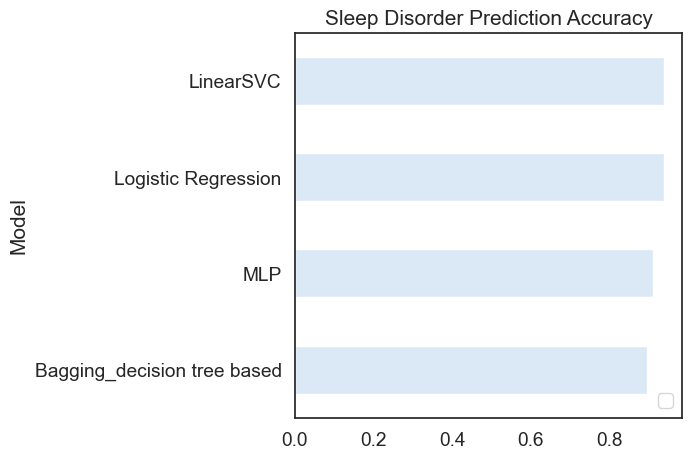

In [127]:
result_df.plot(x='Model', y='accuracy', kind='barh', figsize=(5,5), title='Sleep Disorder Prediction Accuracy')
plt.legend([])
plt.show()

## 6.1 Data Modelling

Another possible solution is to use machine learning algorithms to create predictive models based on client data, to identify the characteristics that most influence the risk of Sleep Disorder. Once these characteristics are identified,the health insurance company can use this information to determine the premium they want the client to pay.Thus, the availability of machine-learning-based predictive tools enables health Insurance companies to take a more efficient approach in their decision making.

The case of Sleep disorders can be treated as a multi-class classification problem. The goal is to predict whether a patient has any of the sleep disorder or not. The target variable in this case can be specified as a multi variable, where we have 3 classes of variable 'No disorder', 'Sleep Apnea', 'Sleep Insommia'.
I will be using the OneVsRestClassifier for my data set as it is a multi class data. However, by design, it doesn't provide feature importances directly. As Feature importances are usually related to specific binary classifiers like decision trees or random forests.
OneVsRestClassifier is a strategy used for multiclass classification, which typically wraps another base classifier to extend it to multiclass problems. 

A wide range of machine learning algorithms will be used to solve the problem, we will use:

- Nonlinear classification methods, such as the k-nearest-neighbors method. The K-NeighborsClassifier uses a distance function to determine the k neighbors most similar to the instance to be classified and assigns the instance to the most common class among the neighbors.
- Linear classification techniques, such as LogisticRegression, which use a logistic function to predict the probability that an instance belongs to one of two classes and also the Linear Support Vector Machine, which tends to find a hyperplane to maximize the distance between classified samples.
- Decision tree algorithms can be used to simulate more complex interactions between input factors and the target variable. BaggingClassifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset. The program uses majority voting to provide a final prediction.
- Multilayer perception is a artificial neural network that is widely used in machine learning and deep learning. It is a feedforward neural network, meaning that data flows in one direction, from the input layer through one or more hidden layers to the output layer.In multiclass classification, each output neuron corresponds to a class, and the class with the highest activation is the predicted class..

To evaluate the performance of machine learning models, we will use the accuracy metric, precision, recall and F1 score.

- Accuracy reflects the percentage of correct predictions of the model.
- Precision is the percentage of correct positive predictions made by the model out of all positive predictions made by the model.
- Recall is the percentage of correct positive predictions out of the total true positives in the data set.
- F1 score is the harmonic mean of accuracy and recall.


## 6.2 Conclusion and Reccomendation

The report's comprehensive analysis underscores the multifaceted nature of sleep patterns, revealing that various factors can significantly impact an individual's sleep quality, potentially leading to different types of sleep disorders. Key insights extracted from the heat map analysis highlight strong correlations between occupation and blood pressure values with the occurrence of sleep disorders. This information presents a valuable opportunity for health insurance companies to prioritize follow-ups with specific occupational groups, notably software engineers and sales representatives, where further data collection is warranted to yield more precise conclusions.

Moreover, the study indicates a substantial influence of an individual's level of physical activity on the quality of sleep they experience. Notably, the "No Disorder" group exhibits the highest average sleep quality, while the "Insomnia" group, while averaging slightly lower, showcases a narrower range of variability. In contrast, the "Sleep Apnea" group displays the most significant variance in sleep quality scores, encompassing a broad spectrum of experiences.

**Recommendations**

To enhance the robustness of future investigations, it is advisable to address the existing dataset imbalance across various variables, ensuring a more representative sample.

Furthermore, evaluating the performance of diverse machine learning models and identifying opportunities for model enhancement, including feature enrichment and more advanced algorithms, could yield more accurate predictions and deeper insights into the complex interplay of factors influencing sleep quality. This refined approach has the potential to unlock valuable information for healthcare professionals and policymakers alike.

## 7. Executive Summary

An health insurance company have tasked us to identify whether or not a potential client is likely to have a sleep disorder. The company wants to use this information to determine the premium they want the client to pay.

Our goal is to Construct a classifier to predict the presence of a sleep disorder based on the other factors in the dataset.

To achieve these objectives, we have prepared a report covering the following:

1. Analyze the distribution of sleep duration or quality of sleep for each occupation. 
2. Explore if an increased physical activity level result in a better quality of sleep.
3. Explore if the presence of a sleep disorder affect the subjective sleep quality metric.
4. Analyze the link between age and sleep duration.
5. Analyze the factors could contribute to a sleep disorder. 



**The Results**

The report commences with an introductory section that provides an overview of the dataset and outlines the data preprocessing steps. Following this, the report delves into the methodologies employed to extract meaningful insights. The exploratory data analysis reveals several significant findings:

1. **Distribution of Sleep Duration by Occupation:**
   - Accountants, on average, enjoy a sleep duration of approximately 7.11 hours. This group exhibits a low degree of variability in sleep duration, as indicated by a small standard deviation.
   - Doctors report an average sleep duration of approximately 6.97 hours, with slightly more variability compared to accountants.
   - Engineers have the highest average sleep duration, around 7.99 hours, with a moderate level of variability.
   - Occupations like Manager and Sales Representative possess a limited amount of data, resulting in less precise insights.

2. **Distribution of Sleep Quality by Occupation:**
   - Engineers demonstrate the highest sleep quality, with an average duration of roughly 8.41 hours. This group exhibits minimal variability in sleep quality, as indicated by a low standard deviation.
   - Doctors maintain a mean sleep quality of about 6.65 hours, signifying a moderate level of variation in sleep patterns.
   - Nurses display a broader range of sleep quality, with a mean duration of approximately 7.37 hours. Notably, this group has a standard deviation of approximately 1.55, suggesting a more diverse range of sleep experiences.

3. **Influence of Physical Activity on Sleep Quality:**
   - The application of the scipy ttest_ind method indicates a positive association between increased physical activity and improved sleep quality.

4. **Impact of Sleep Disorders:**
   - Utilizing the pinguion anova method, the report underscores the significant role of sleep disorders in shaping individuals' sleep experiences.

5. **Age-Related Sleep Quality:**
   - Middle-aged adults, on average, exhibit the highest sleep quality, characterized by relatively low variability.
   - Elderly individuals report the highest average sleep quality, albeit with slightly more variability.
   - Young adults and older adults fall in between, with their sleep quality averages and variability positioned within the spectrum of the other groups.

6. **Model Performance:**
   - In predicting patient categorization into one of three groups (No Disorder, Insomnia, Sleep Apnea), Linear SVC and Logistic Regression achieve the highest accuracy scores, indicating their effectiveness in classification tasks.

These findings collectively provide a multifaceted perspective on the complex interplay of factors influencing sleep patterns and sleep disorders, offering valuable insights for healthcare professionals and decision-makers.



**Key Recommendation**
- To enhance the robustness of future investigations, it is advisable to address the existing dataset imbalance across various variables, ensuring a more representative sample.

- Furthermore, evaluating the performance of diverse machine learning models and identifying opportunities for model enhancement, including feature enrichment and more advanced algorithms, could yield more accurate predictions and deeper insights into the complex interplay of factors influencing sleep quality. This refined approach has the potential to unlock valuable information for healthcare professionals and policymakers alike.